# Introduction

Dans ce projet, notre objectif principal est de prédire la variable cible '**y**', représentant une issue binaire dans notre ensemble de données. Cette tâche se présente comme un défi classique de classification dans le domaine du machine learning. Nous avons abordé ce défi en commençant par une analyse exploratoire détaillée des données. Cette étape initiale nous a permis de comprendre les caractéristiques de notre jeu de données, y compris les types de données, la présence de valeurs manquantes, et la distribution des classes.

### Importation des bibliothèques nécessaires

In [1]:
%pip install pandas matplotlib seaborn scikit-learn imbalanced-learn graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

# Analyse exploratoire

Le projet débute par une analyse exploratoire approfondie pour comprendre la distribution et la nature des différentes variables. Des visualisations telles que des diagrammes en barres, des histogrammes et des boxplots ont été utilisées pour examiner la distribution des variables, à la fois qualitatives et quantitatives.

## Importation de la base de données complète (bank-full.csv)

S'assurer que les deux datasets sont bien présents dans le répertoire général

In [3]:
df = pd.read_csv('datasource/bank-full.csv', delimiter=';', na_values='None')

print(df.head())
nombre_observations, nombre_attributs = df.shape
print(f"Nombre d'observations : {nombre_observations}")
print(f"Nombre d'attributs : {nombre_attributs}")

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Nombre d'observations : 45211
Nombre d'attributs : 17


## Rapide aperçu de la base

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
donnees_manquantes_par_attribut = df.isna().sum()

print("Nombre de données manquantes par attribut :")
print(donnees_manquantes_par_attribut)

Nombre de données manquantes par attribut :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [8]:
catagorical_data=[j for j in df.columns if df[j].dtype=="O"]
print("keys with catagorical dataset are : ","\033[1m" ,catagorical_data)

numerical_features=[k for k in df.columns if df[k].dtype!="O"]
print("\033[0m", "keys with numerical dataset are :""\033[1m",numerical_features)

keys with catagorical dataset are :   ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
 keys with numerical dataset are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## Comprendre les variables catégorielles


In [9]:
def summarize_dataset(df):
    summary = pd.DataFrame({
        'Feature': df.columns,
        'Type': df.dtypes,
        'Num of Categories': [df[col].nunique() if df[col].dtype == 'object' else '-' for col in df.columns]
    })

    return summary


summary = summarize_dataset(df)
print(summary)

             Feature    Type Num of Categories
age              age   int64                 -
job              job  object                12
marital      marital  object                 3
education  education  object                 4
default      default  object                 2
balance      balance   int64                 -
housing      housing  object                 2
loan            loan  object                 2
contact      contact  object                 3
day              day   int64                 -
month          month  object                12
duration    duration   int64                 -
campaign    campaign   int64                 -
pdays          pdays   int64                 -
previous    previous   int64                 -
poutcome    poutcome  object                 4
y                  y  object                 2


### Distribution des variables catégorielles

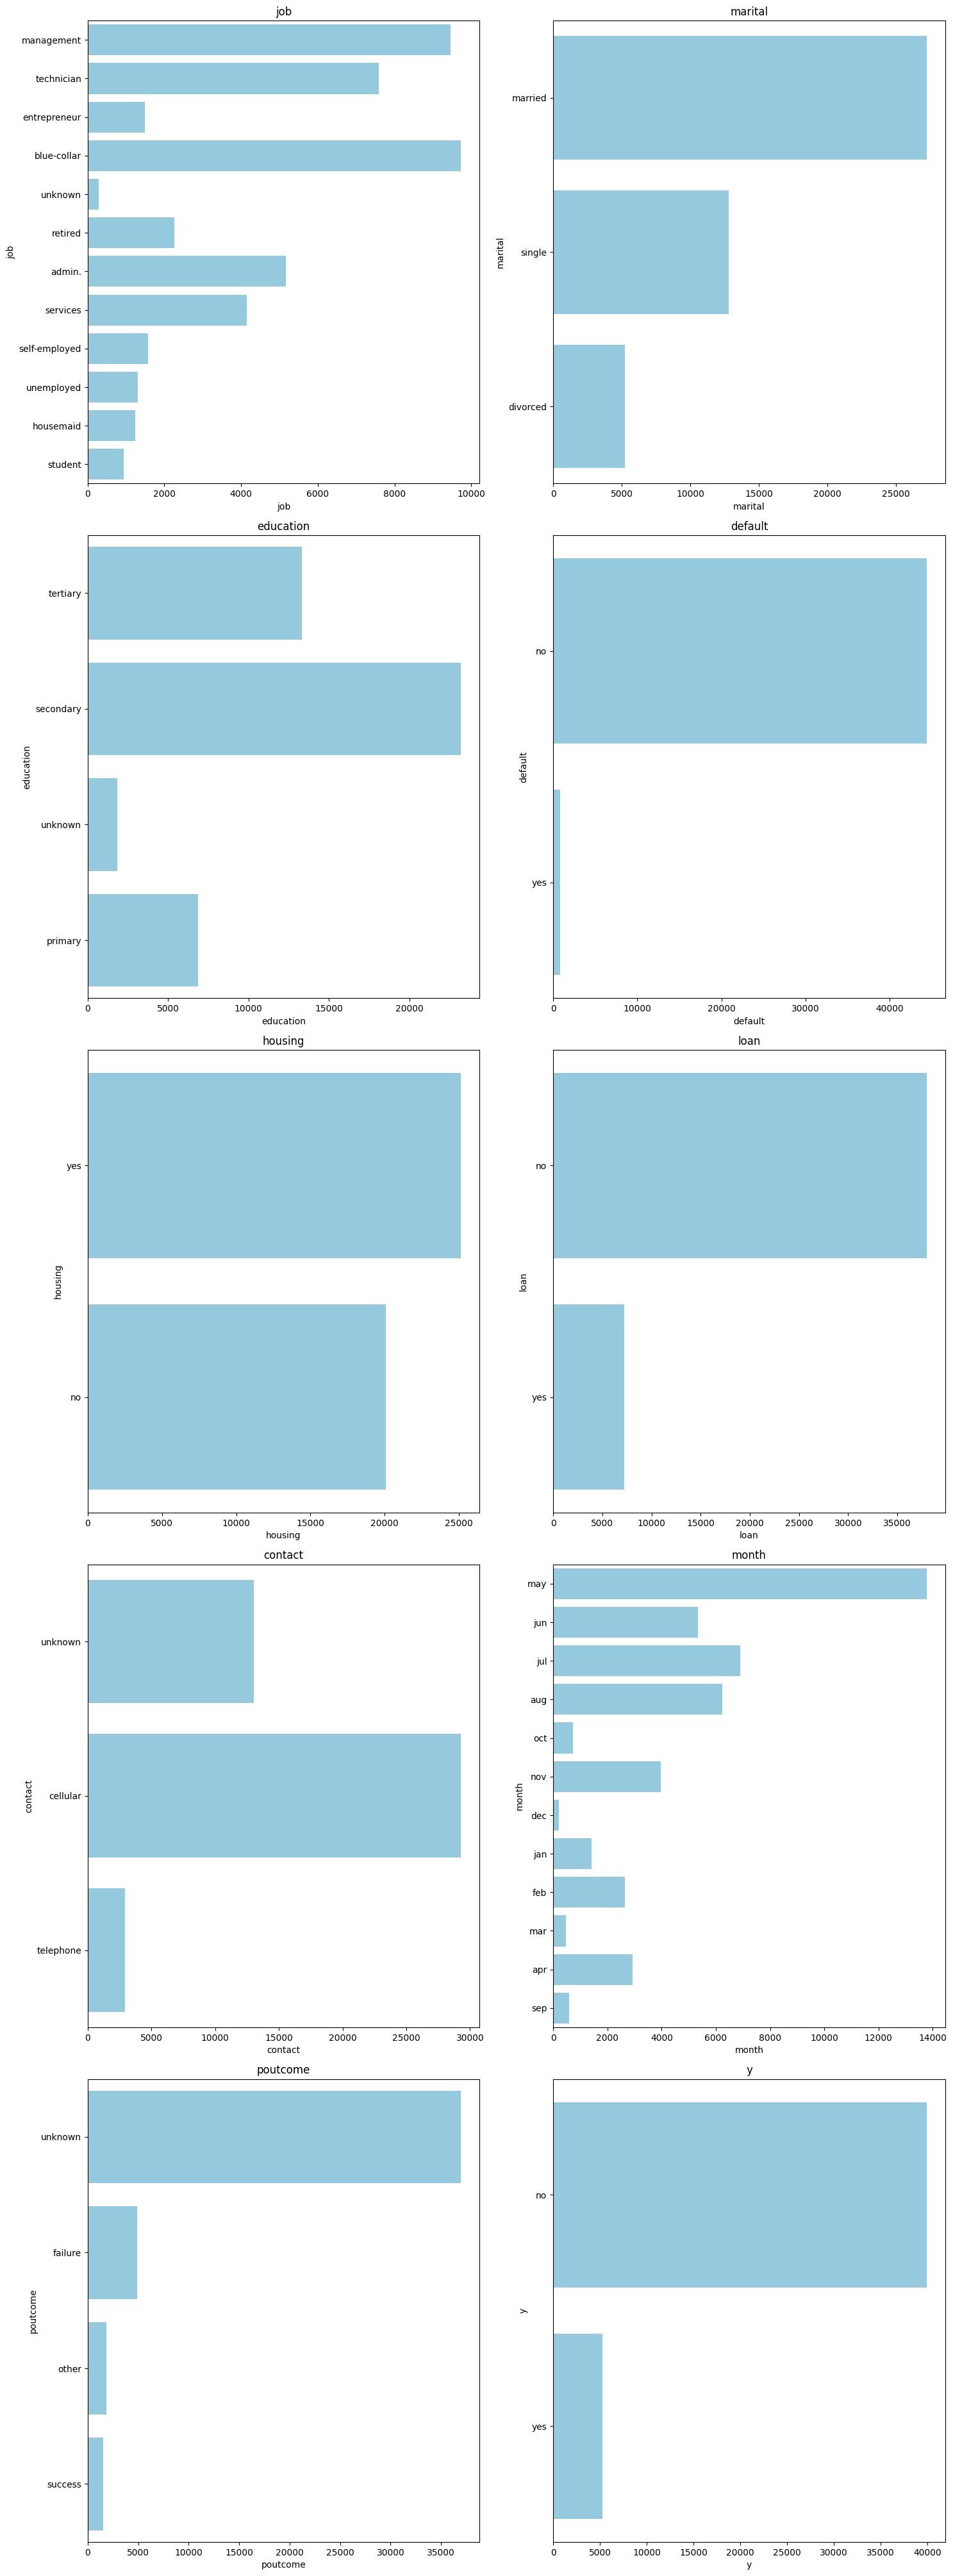

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 80), facecolor='white')

plotnumber = 1
total_plots = len(catagorical_data)

for categorical_feature in catagorical_data:
    ax = plt.subplot(total_plots, 2, plotnumber)
    sns.countplot(y=categorical_feature, data=df, color='skyblue')

    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)

    plotnumber += 1

plt.tight_layout()
plt.show()

Chaque graphique présente la fréquence de chaque catégorie pour la caractéristique concernée.
On remarque ici est que la variable cible **'y'**, qui représente une réponse oui/non à une campagne, montre une distribution **déséquilibrée** avec une grande majorité de '**no**' par rapport à '**yes**'.

Afin de bien le montrer, on peut le représenter avec le graphique suivant:

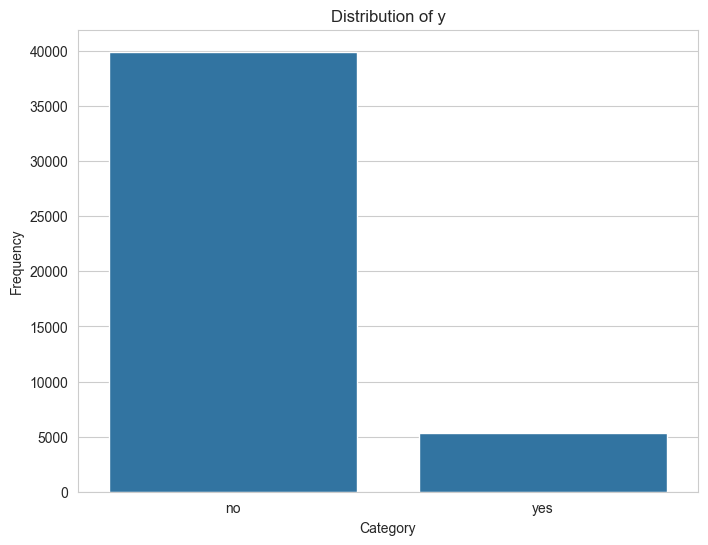

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="y", data=df)

ax.set_title('Distribution of y')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')


plt.show()


### Relation entre chaque caractéristique catégorielle et la variable cible y

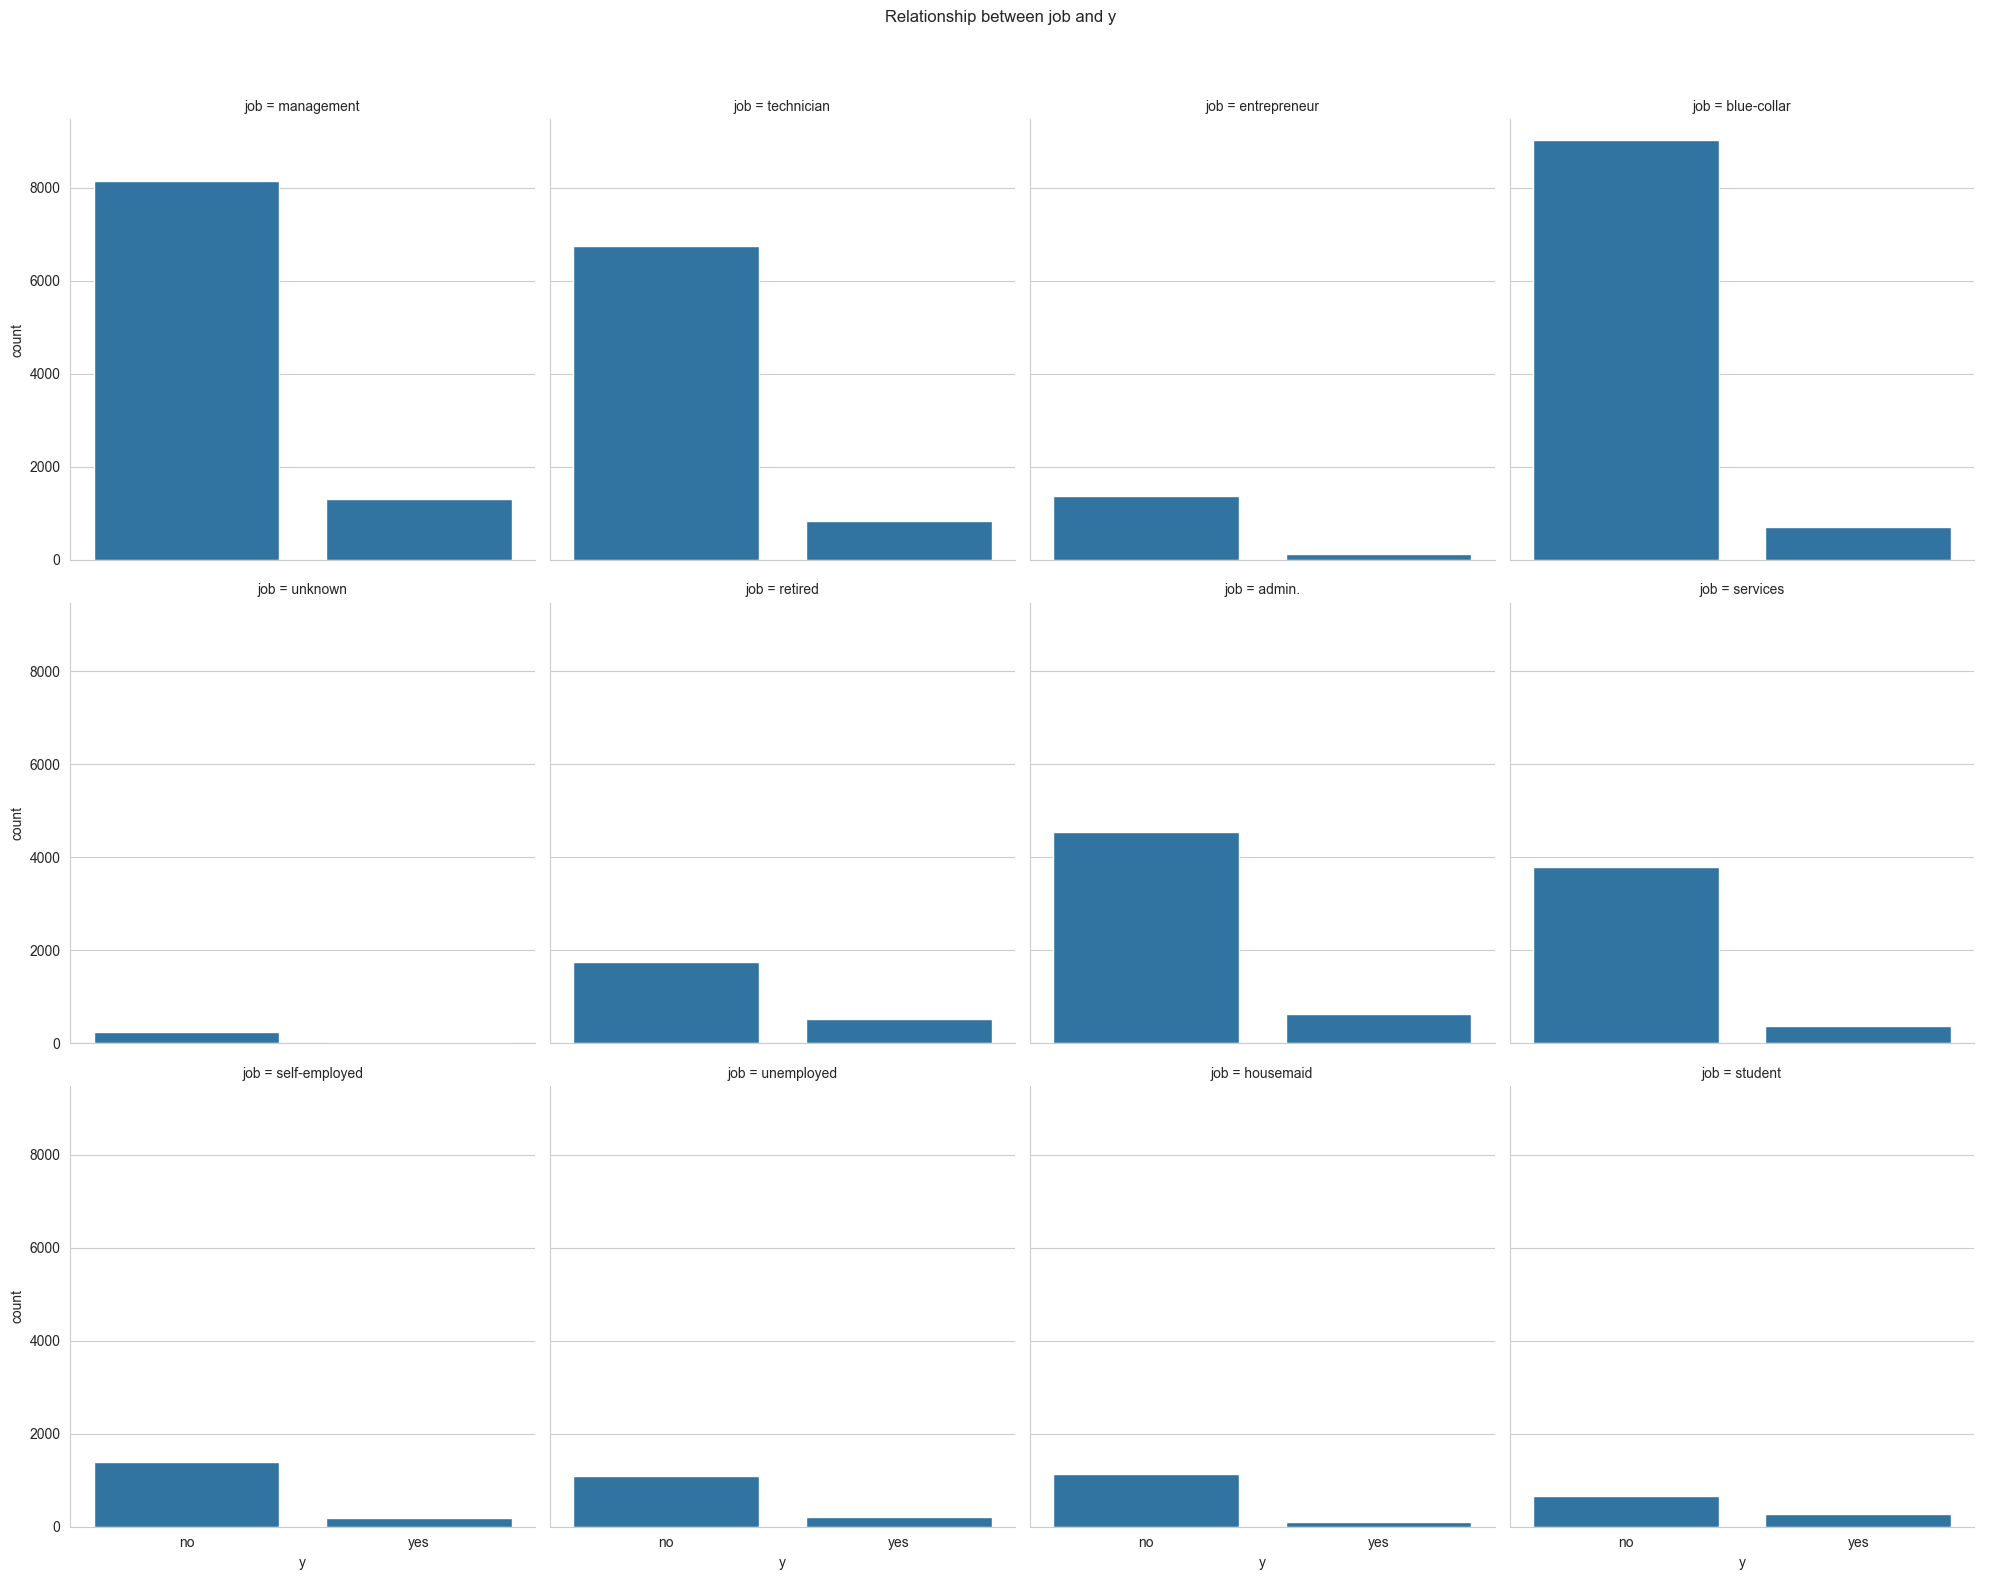

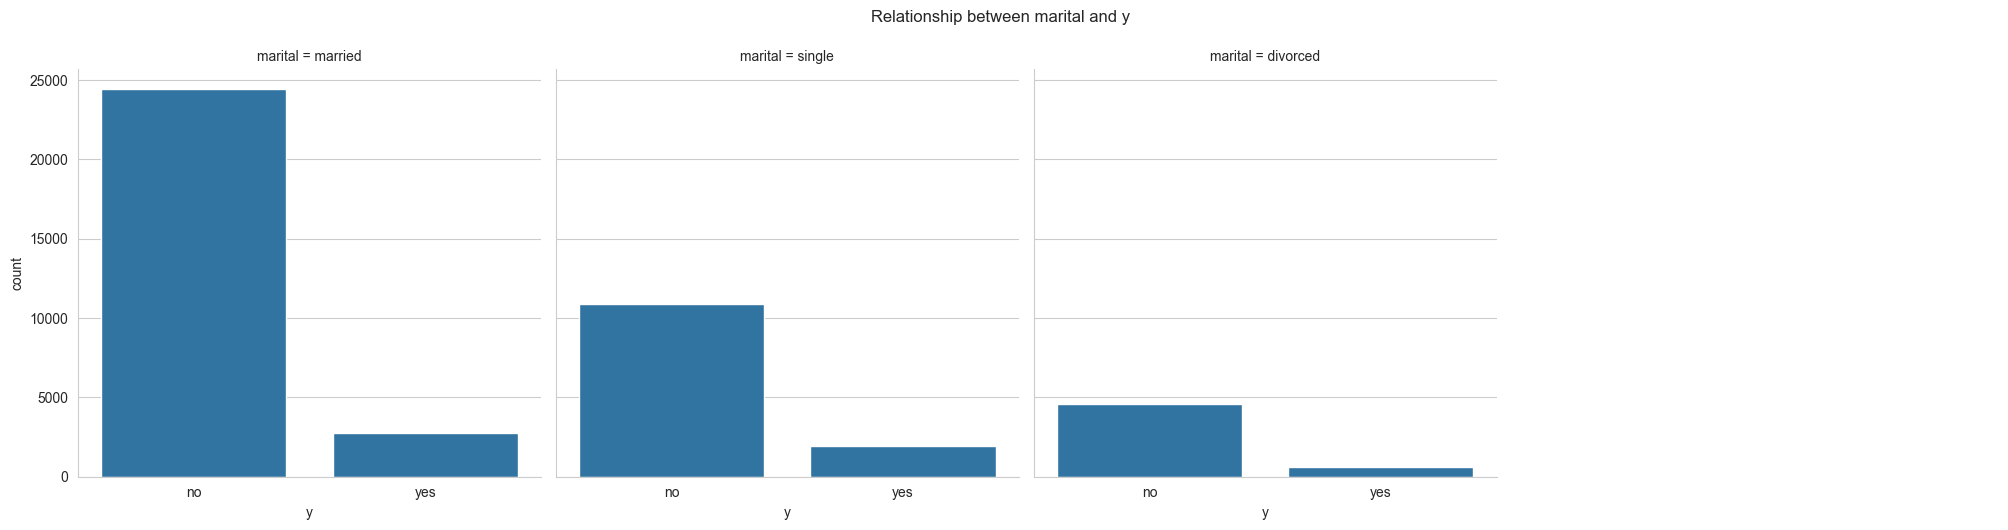

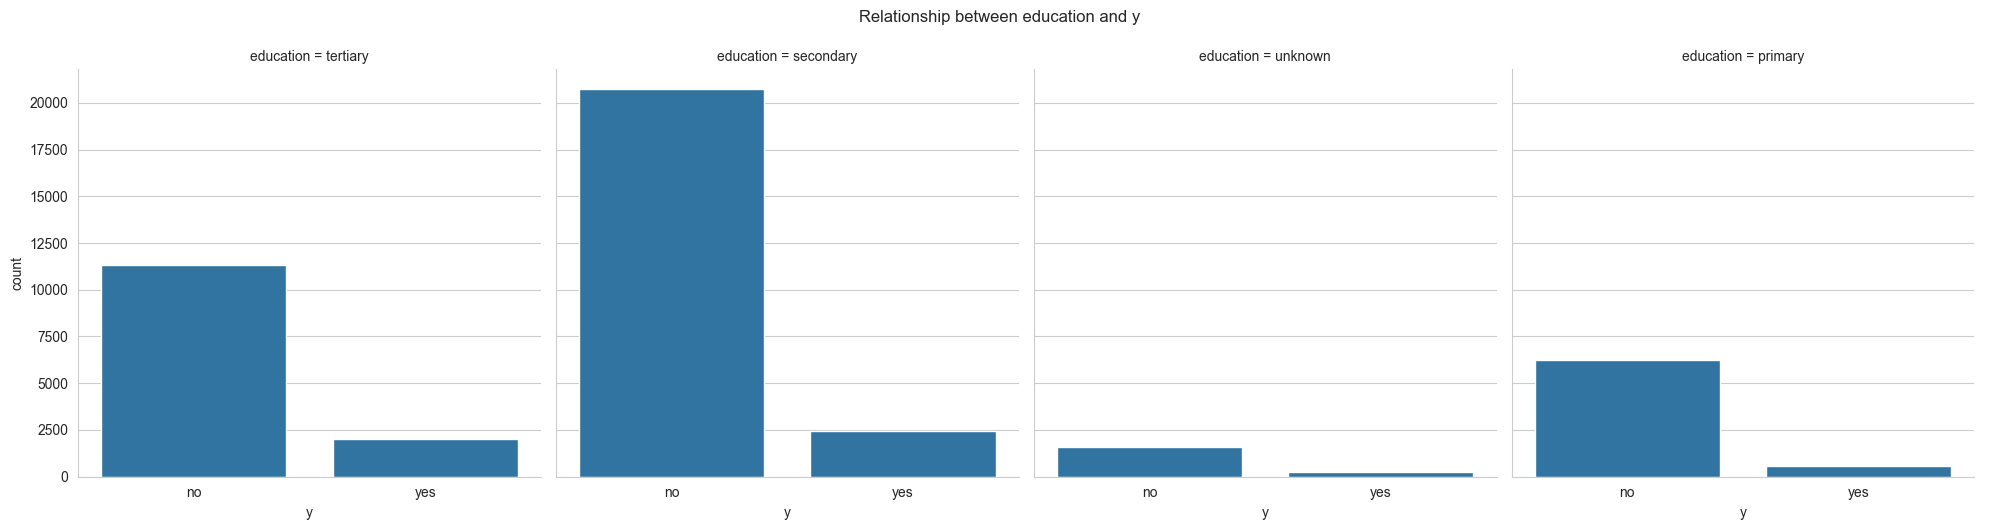

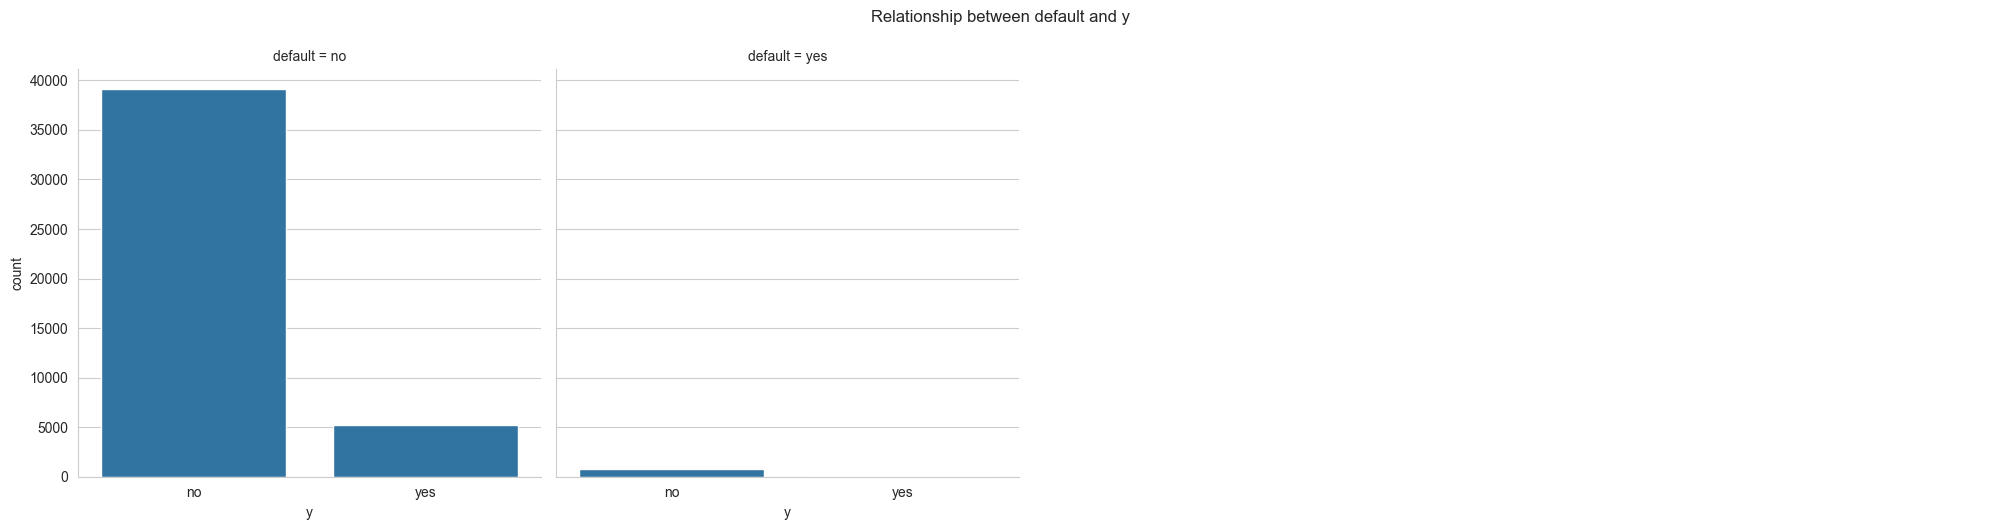

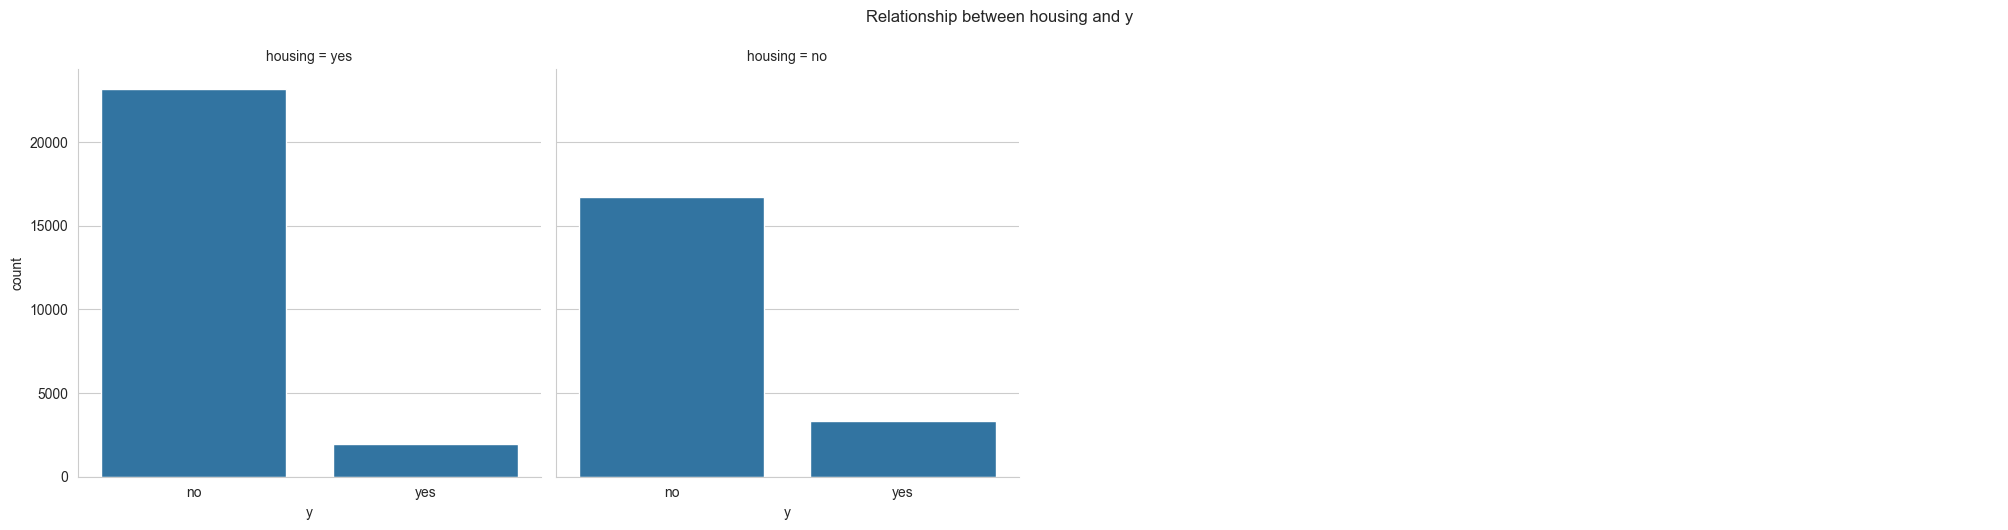

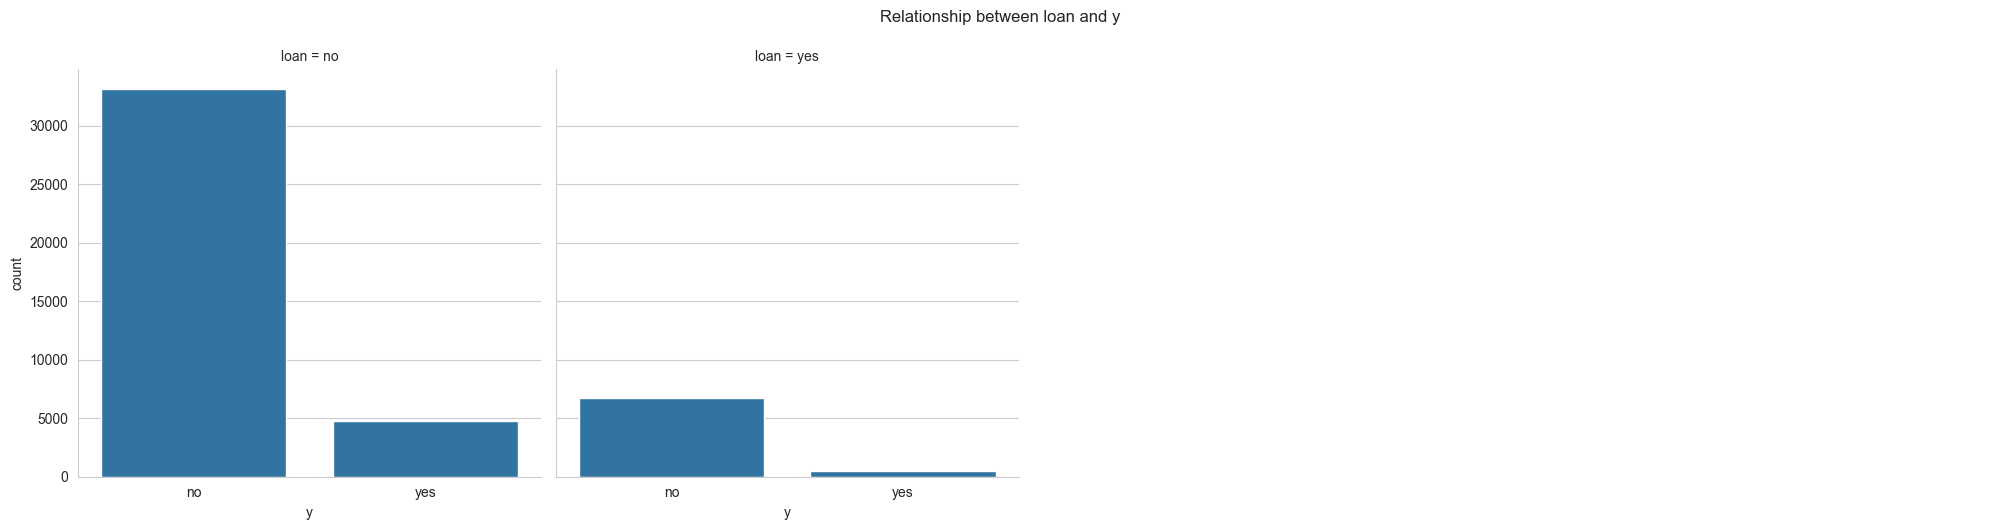

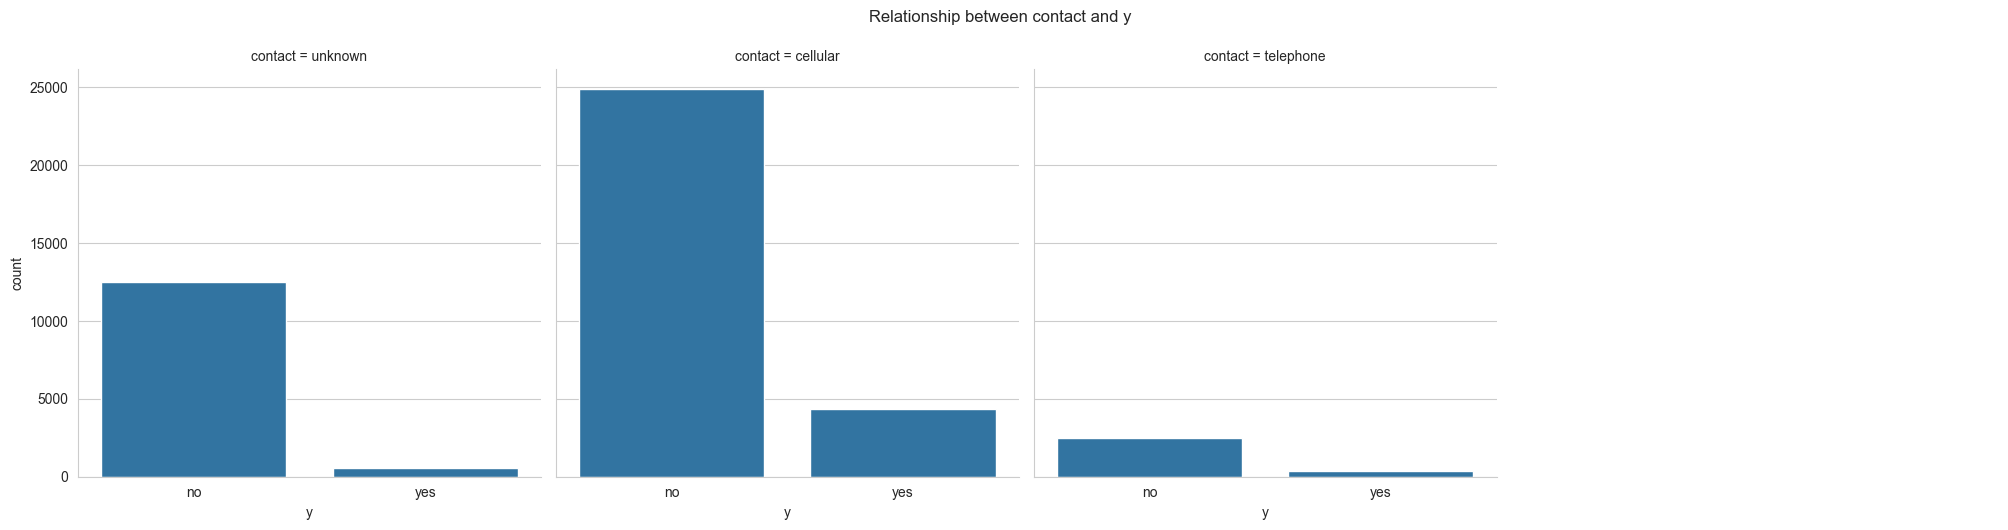

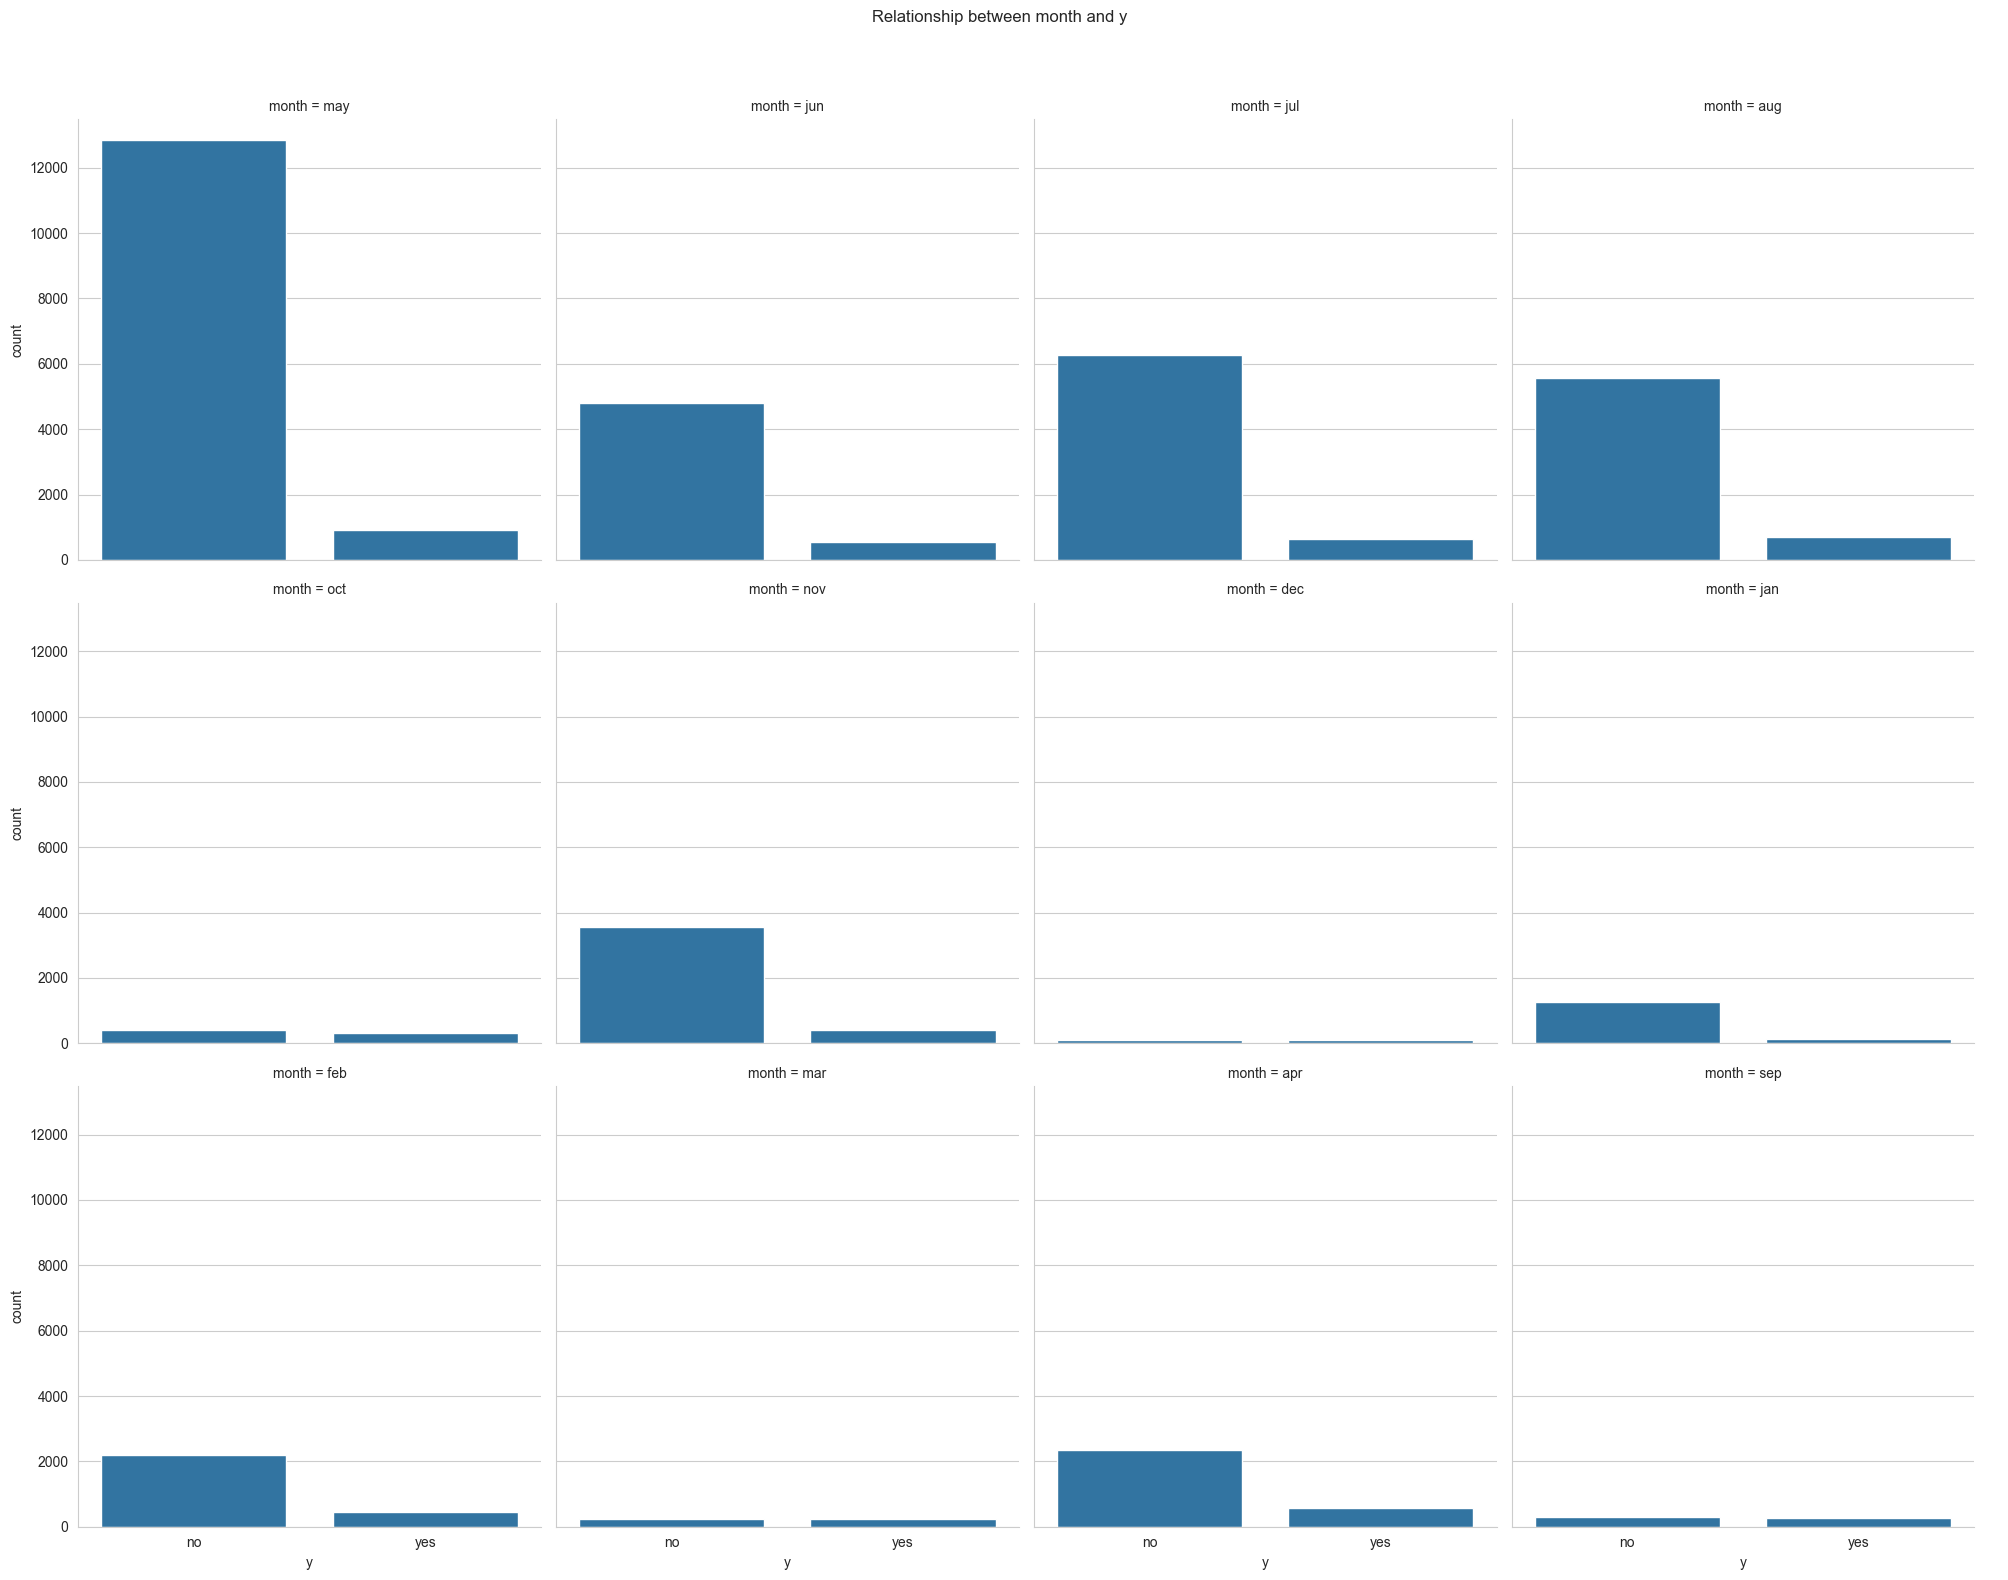

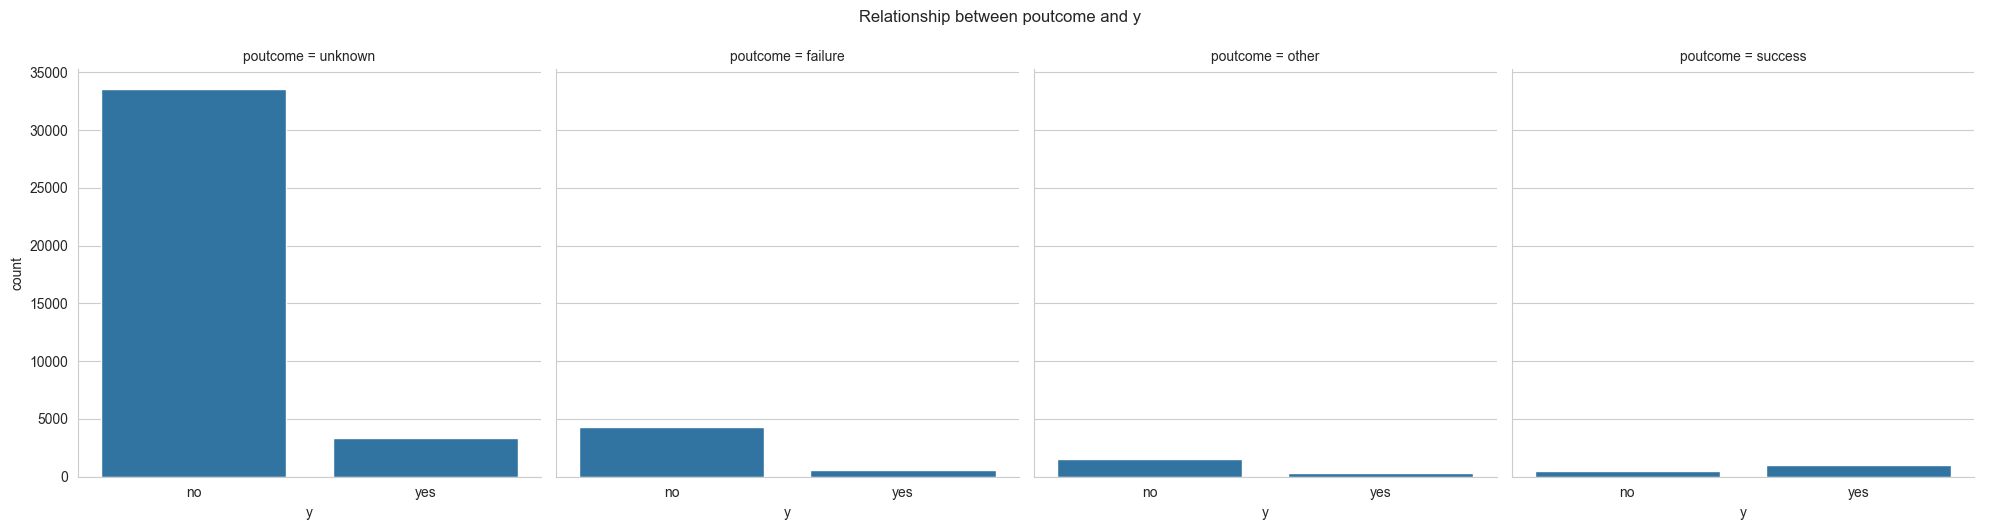

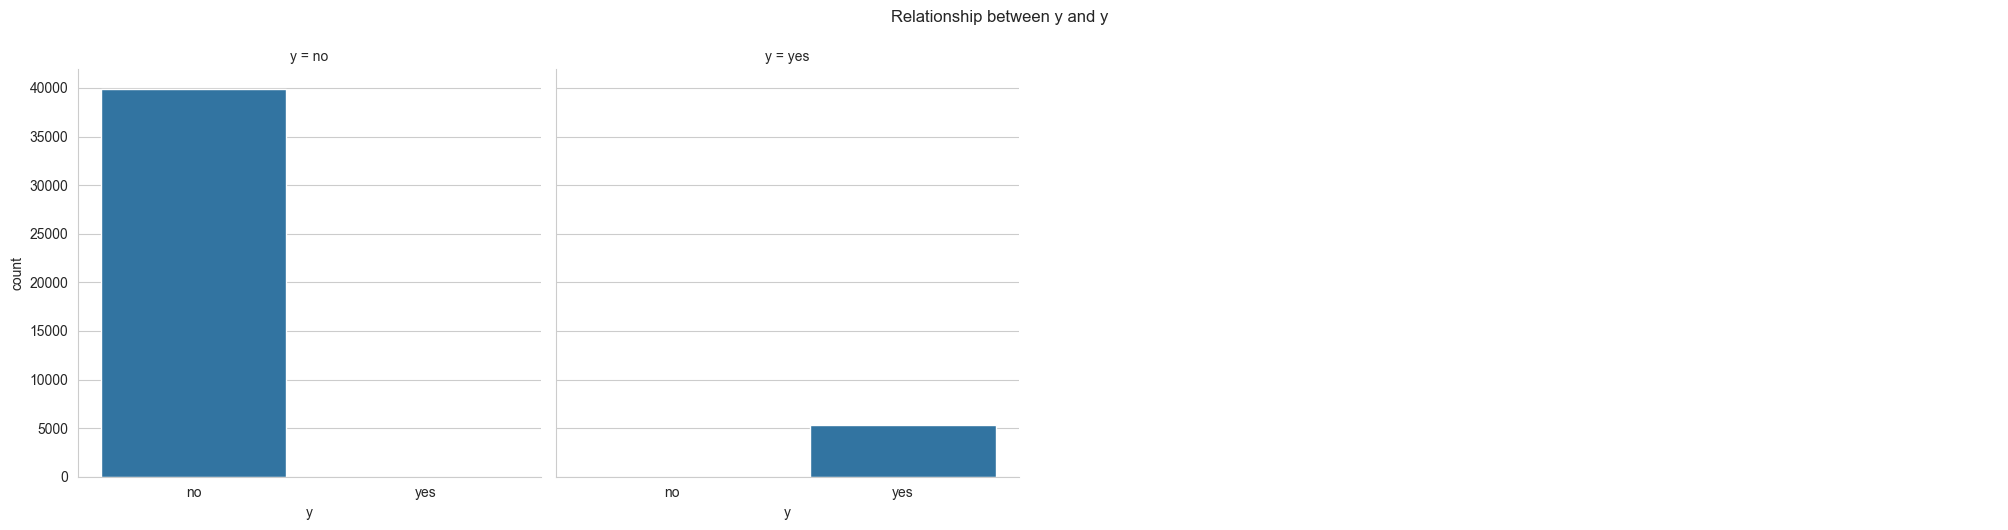

In [12]:
for categorical_feature in catagorical_data:
    g = sns.catplot(x='y', col=categorical_feature, kind='count', data=df, col_wrap=4)
    g.fig.suptitle(f'Relationship between {categorical_feature} and y', y=1.05)

plt.show()

Ces graphiques montrent le décompte des réponses "oui" et "non" pour chaque sous-catégorie des caractéristiques catégorielles, et on pourrait les utiliser pour identifier les tendances ou les patterns dans les réponses en fonction de ces caractéristiques.
1. **Job**:
- L'analyse des countplots pour la variable 'job' montre que la catégorie 'blue-collar' présente le plus grand nombre de réponses 'non', ce qui suggère que les individus dans cette catégorie de travail sont moins enclins à répondre positivement à la variable cible 'y'. Par contre, les catégories 'student' et 'retired' montrent une meilleure proportion de réponses 'oui', ce qui pourrait indiquer une plus grande réceptivité ou une implication différente envers la variable cible. Ces observations pourraient être importantes pour cibler certaines stratégies ou pour comprendre le comportement de différents segments professionnels vis-à-vis de la variable cible.

2. **Marital Status**:
- Parmi les personnes mariées, il y a une nette prédominance de la réponse "non", ce qui indique que les personnes mariées sont moins susceptibles de répondre "oui" à la variable cible.
- Les célibataires semblent avoir une proportion plus équilibrée entre "oui" et "non", mais avec toujours plus de "non".
- Les personnes divorcées ont également une prédominance de "non", mais avec un nombre de "oui" notable, indiquant une possible tendance à répondre "oui" à la variable cible comparativement à leur taille de groupe.

3. **Education**:
- Les graphiques montrent que, indépendamment du niveau d'éducation, la majorité des individus ont répondu "non" à la variable cible 'y'. Les individus ayant une éducation secondaire sont les plus nombreux parmi les répondants "non", tandis que ceux ayant une éducation tertiaire représentent une part significative des réponses "oui". Cela suggère que le niveau d'éducation pourrait être un facteur dans la réponse à la variable cible.
4. **Default**:
- La majorité des individus n'ont pas de défaut de crédit ('default = no') et parmi eux, un petit nombre a répondu positivement ('yes') à la variable cible.
- Pour les individus avec un défaut de crédit ('default = yes'), le nombre de réponses positives est encore plus faible, suggérant que le défaut de crédit est un indicateur potentiellement négatif pour la variable cible.
=> Cette information peut indiquer que ceux sans défaut de crédit étant légèrement plus enclins à répondre 'yes'.

5. **Housing Loan**:
- Il y a un nombre significatif de personnes avec un prêt immobilier qui ont répondu "non", et relativement moins ont répondu "oui".
- Pour ceux sans prêt immobilier, le nombre de réponses "non" est encore plus élevé proportionnellement par rapport à "oui".

6. **Loan**:
- les graphiques indiquent que les personnes sans prêt personnel sont plus nombreuses, mais la proportion de réponses "oui" et "non" n'est pas radicalement différente de celles des personnes avec un prêt personnel.

6. **Contact**:
- les modes de contact "cellulaire" et "inconnu" sont les plus utilisés, avec une prépondérance de réponses "non" à la variable cible. Le mode de contact peut influencer la réponse des individus, et il semble que les contacts par téléphone cellulaire aient un meilleur taux de réponse "oui" que les autres modes.

6. **Month**:
- Les mois de mai, juillet et août montrent un grand nombre de réponses "non" par rapport à "oui". Cela pourrait indiquer une activité ou une campagne spécifique pendant ces mois qui n'a pas entraîné beaucoup de réponses positives.
- D'autres mois comme mars, octobre, décembre et février semblent avoir une meilleure proportion de réponses "oui" comparativement à leur nombre total de réponses, ce qui pourrait être dû à des campagnes saisonnières ou des événements spécifiques.

6. **poutcome**:

- La catégorie 'unknown' montre une grande majorité de réponses "non", indiquant que lorsque l'issue d'une campagne précédente n'est pas connue, il est peu probable que la réponse actuelle à la variable cible soit "oui".
- Pour 'failure', où la campagne précédente a échoué, il y a également plus de réponses "non" que "oui", mais le nombre de réponses "oui" est proportionnellement plus élevé que dans la catégorie 'unknown'.
- 'Other' indique les résultats qui ne sont ni un succès ni un échec, et cette catégorie présente un nombre modeste de réponses, avec légèrement plus de "non" que de "oui".
- Enfin, pour 'success', où la campagne précédente a réussi, il y a une nette prédominance de réponses "oui" par rapport à "non".

Ces données suggèrent que le succès d'une campagne précédente est un indicateur fort d'une réponse positive dans la campagne actuelle, tandis que l'échec ou l'inconnu des campagnes précédentes est moins propice à une réponse positive.

Conclusion: Une présence accrue de réponses "oui" dans une sous-catégorie spécifique pourrait indiquer une corrélation positive avec la variable cible, et inversement, une prédominance de "non" pourrait indiquer une corrélation négative. Ces insights peuvent être utiles pour comprendre les groupes qui sont plus ou moins enclins à répondre positivement à la variable cible.

## Comprendre les variables numériques

### Variables discrètes

In [13]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables count:{}".format(len(discrete_features)))

Discrete variables count:0


Aucune valeur discrète n'est présente ici.

### Variables continues

In [14]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 7


Il y a 7 variables numériques continues

### Distribution des variables continues



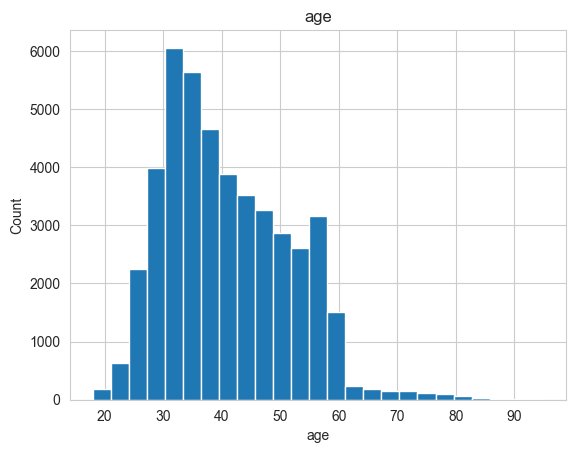

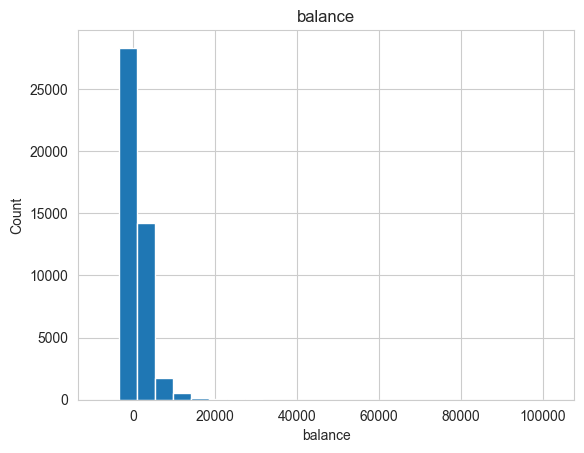

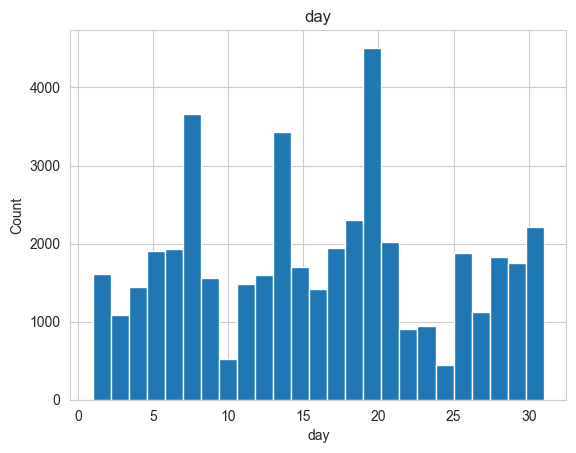

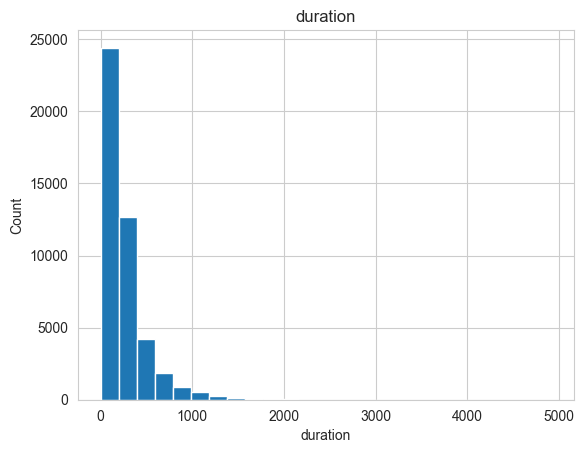

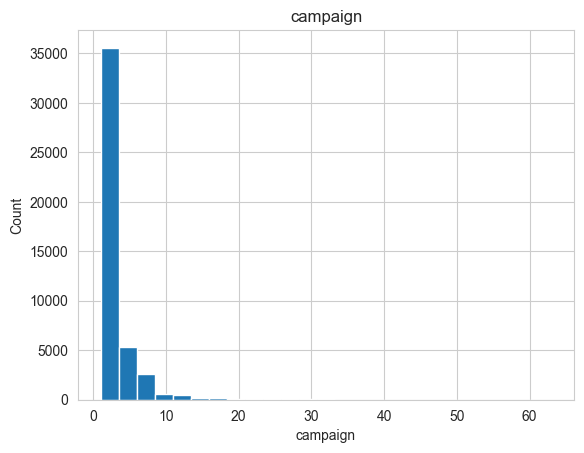

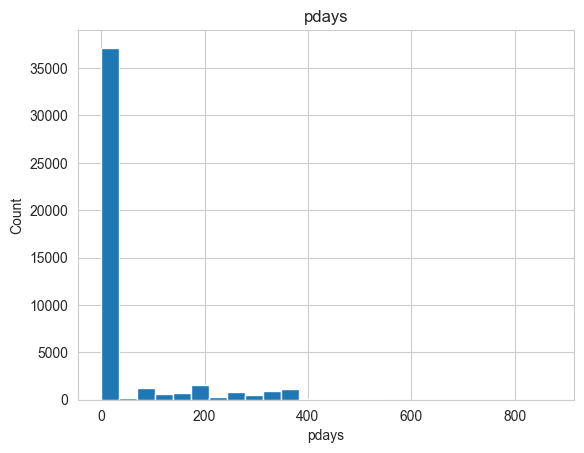

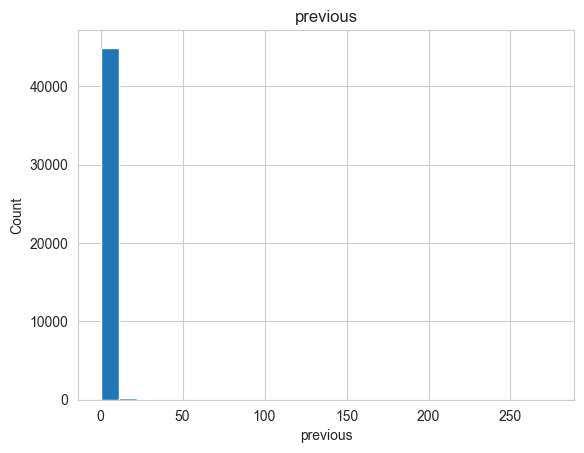

In [15]:
for feature in continuous_features:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Relation entre chaque variable continue et la variable cible y



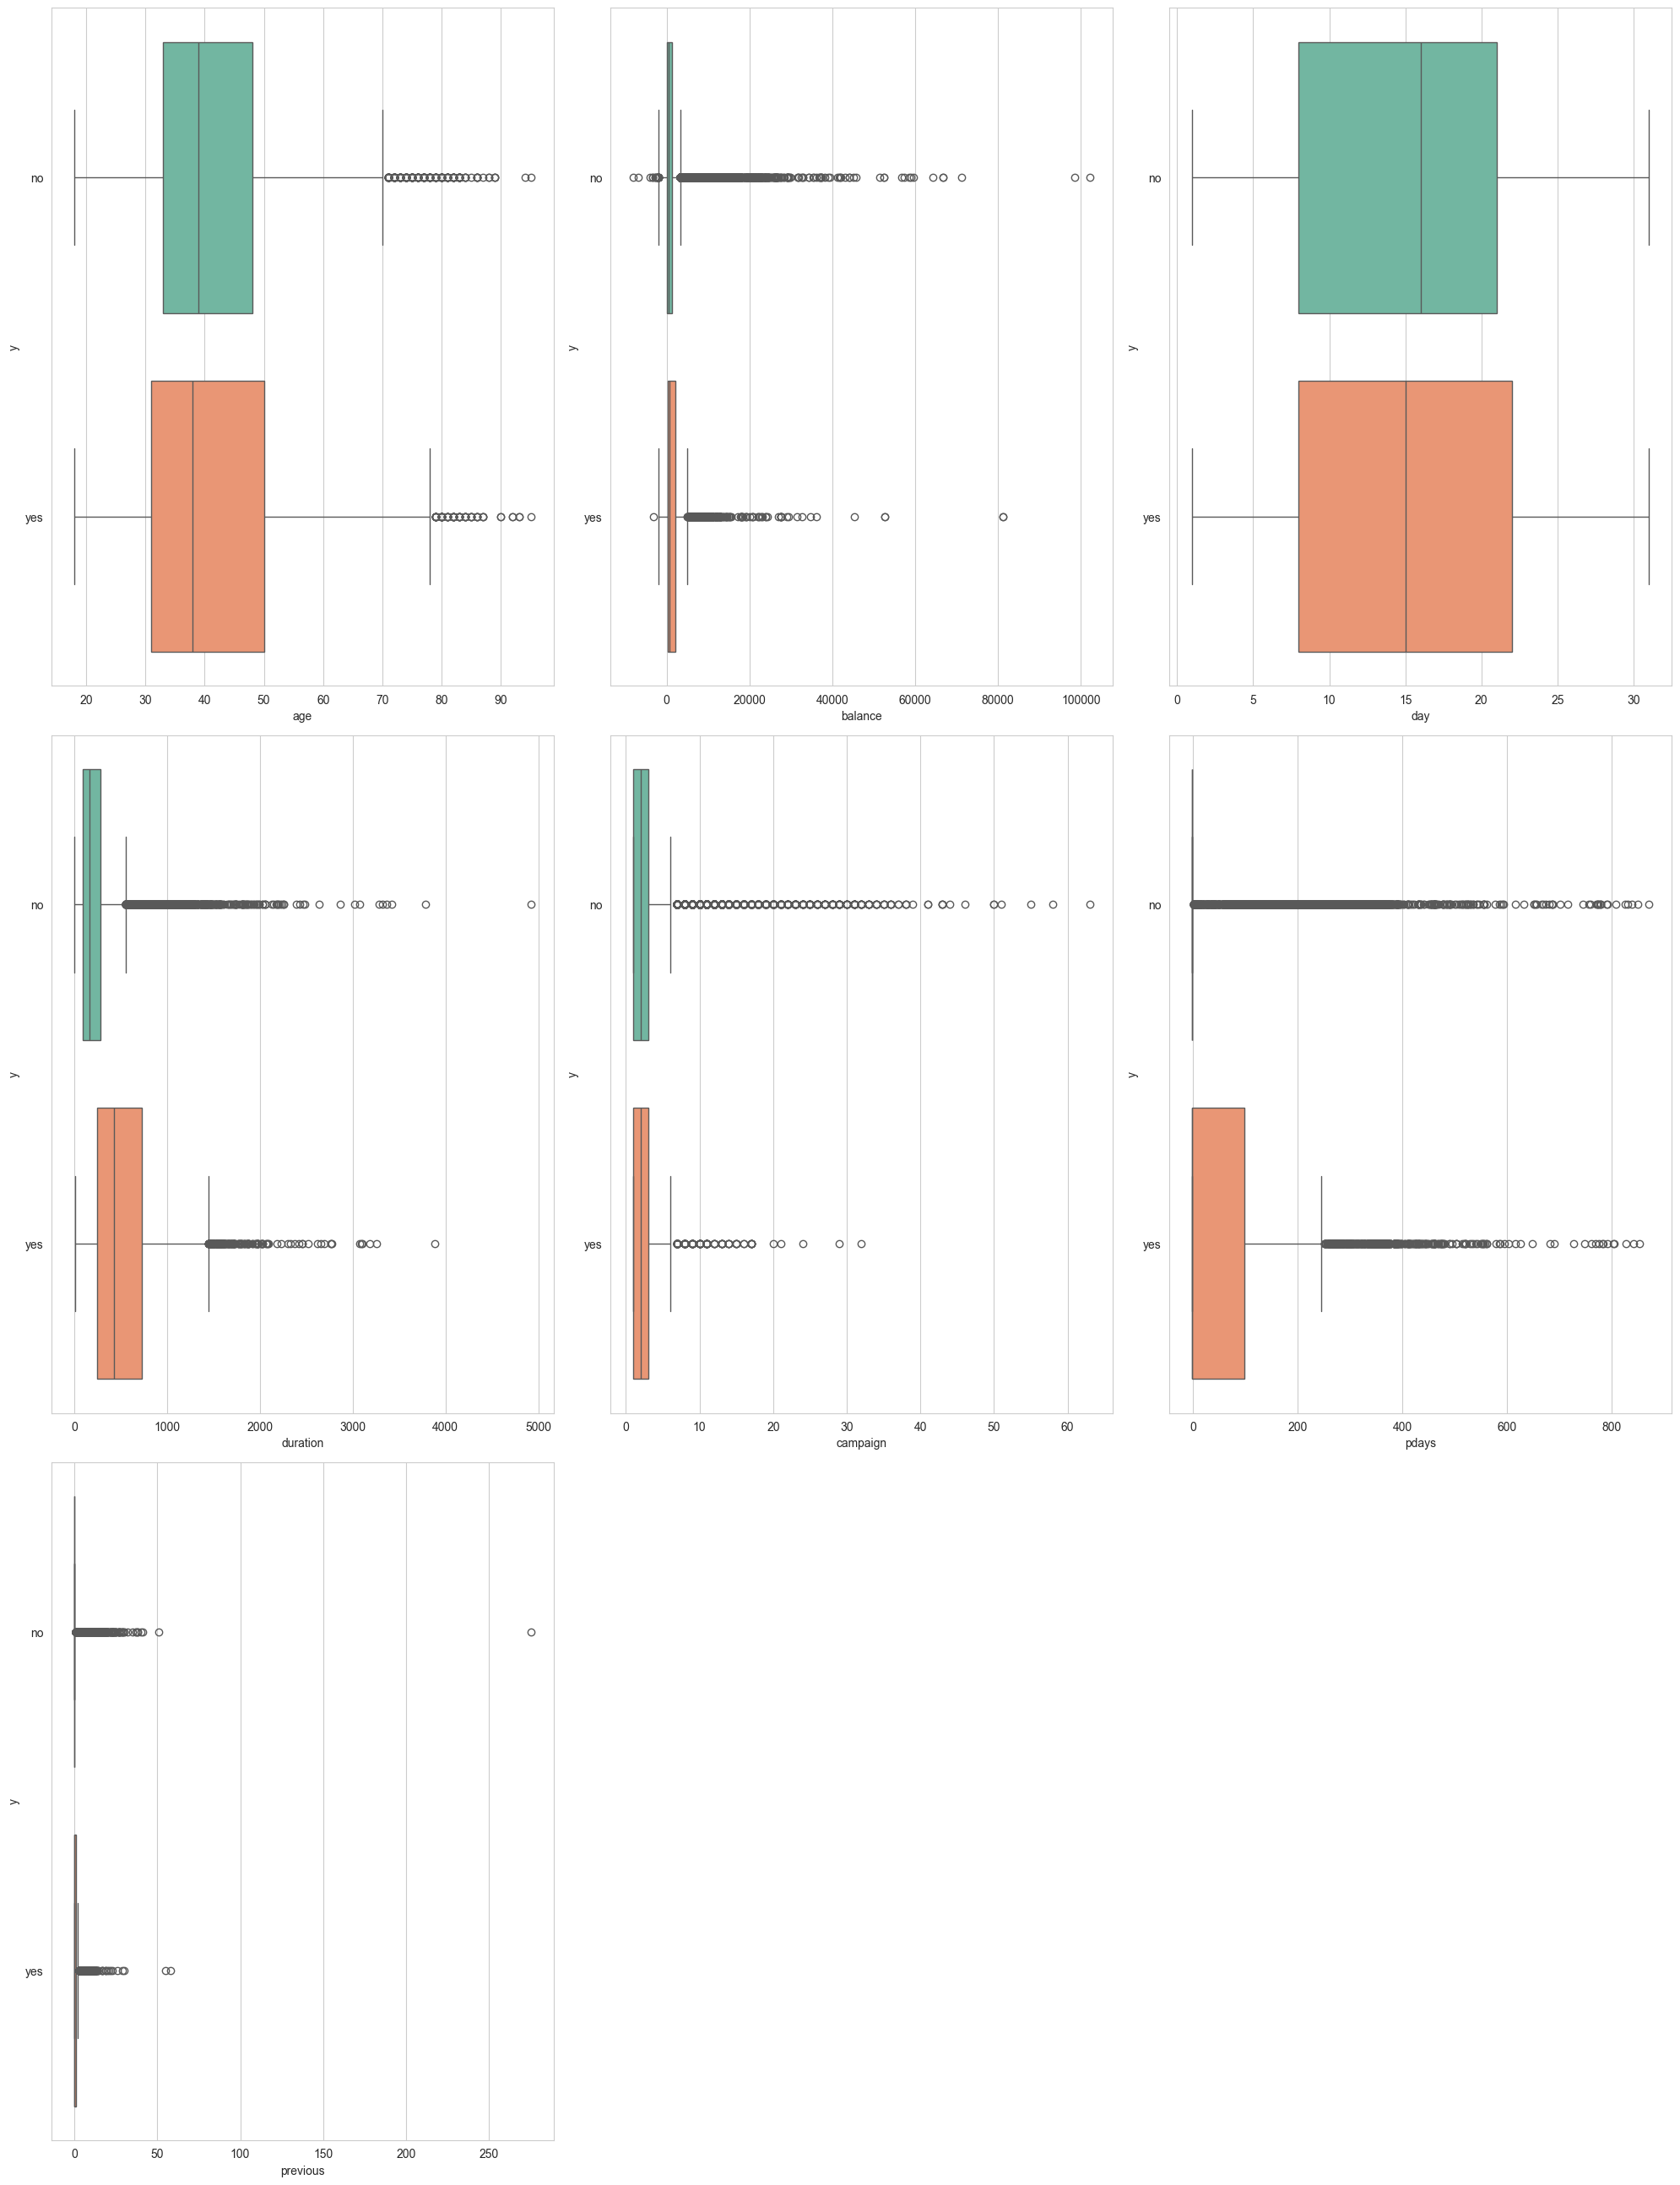

In [16]:
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
palette = "Set2"

for feature in numerical_features:
    ax = plt.subplot(len(numerical_features), 3, plotnumber)
    sns.boxplot(x=feature, y='y', data=df, hue='y', palette=palette)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Affichage des outliers

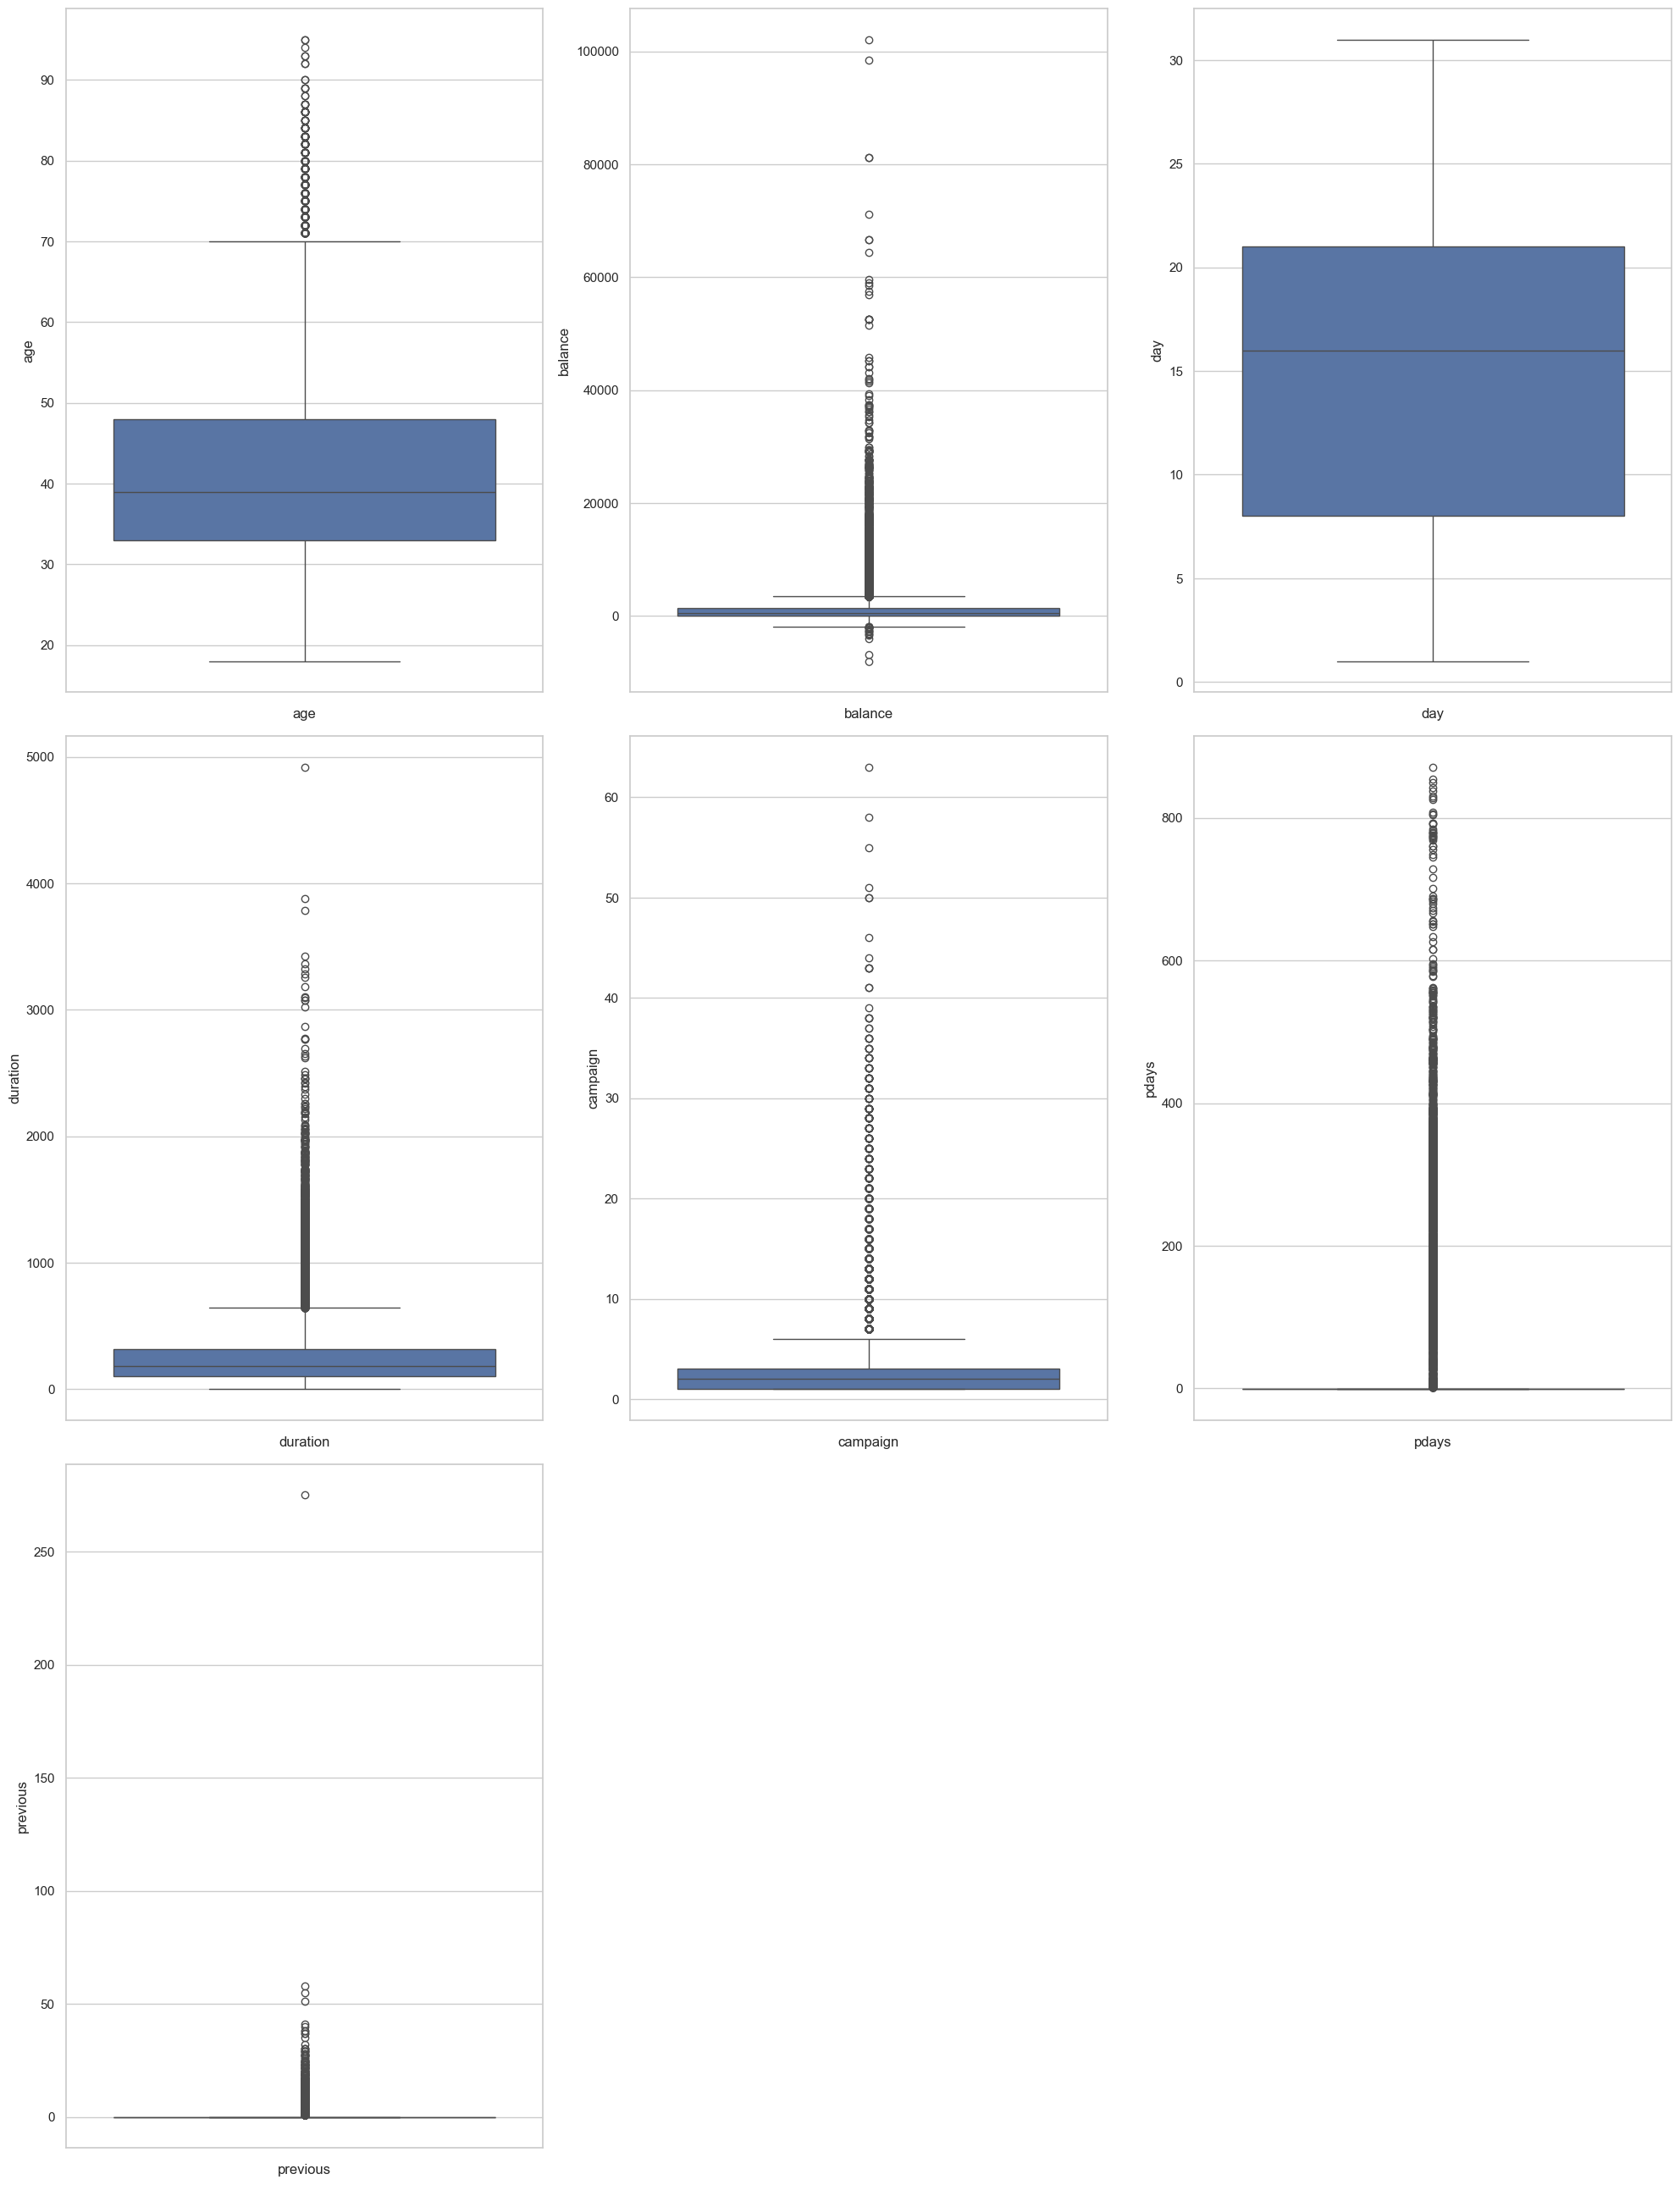

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(len(numerical_features), 3, plotnumber)
    sns.boxplot(y=feature, data=df)
    plt.xlabel(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

Dans la section suivante, nous allons éliminer les outliers. Ceci est très en ML car ces valeurs extrêmes peuvent fausser les résultats et réduire la précision des modèles. Les outliers peuvent influencer de manière disproportionnée l'entraînement des modèles, en particulier dans les algorithmes sensibles aux variations de données.

### Standardisation et Filtrage basé sur le Score Z



In [18]:
# Standardisation des colonnes numériques
data_numeric = df[numerical_features]
Z = (data_numeric - data_numeric.mean()) / data_numeric.std()

# Filtrage des outliers ( Z > 3 ou Z <= -3)
print('Nombre de lignes avant d’éliminer les outliers = %d' % (df.shape[0]))

df_filtered = df[(Z > -3).all(axis=1) & (Z <= 3).all(axis=1)]
print('Nombre de lignes après élimination des outliers = %d' % (df_filtered.shape[0]))

# Nous allons utiliser ce dataframe spécifiquement pour les algorithmes de Naive Bayes et Deicision Tree
df2 = df_filtered

Nombre de lignes avant d’éliminer les outliers = 45211
Nombre de lignes après élimination des outliers = 40209


### Normalisation de données numériques




Nous allons normaliser en utilisant StandardScaler.
Ceci nous permettra de nous assurer que tous les attributs numériques contribuent équitablement à l'apprentissage du modèle. Sans normalisation, les variables avec des grandeurs plus grandes peuvent dominer celles avec des petiteurs plus petites, biaisant potentiellement les résultats.

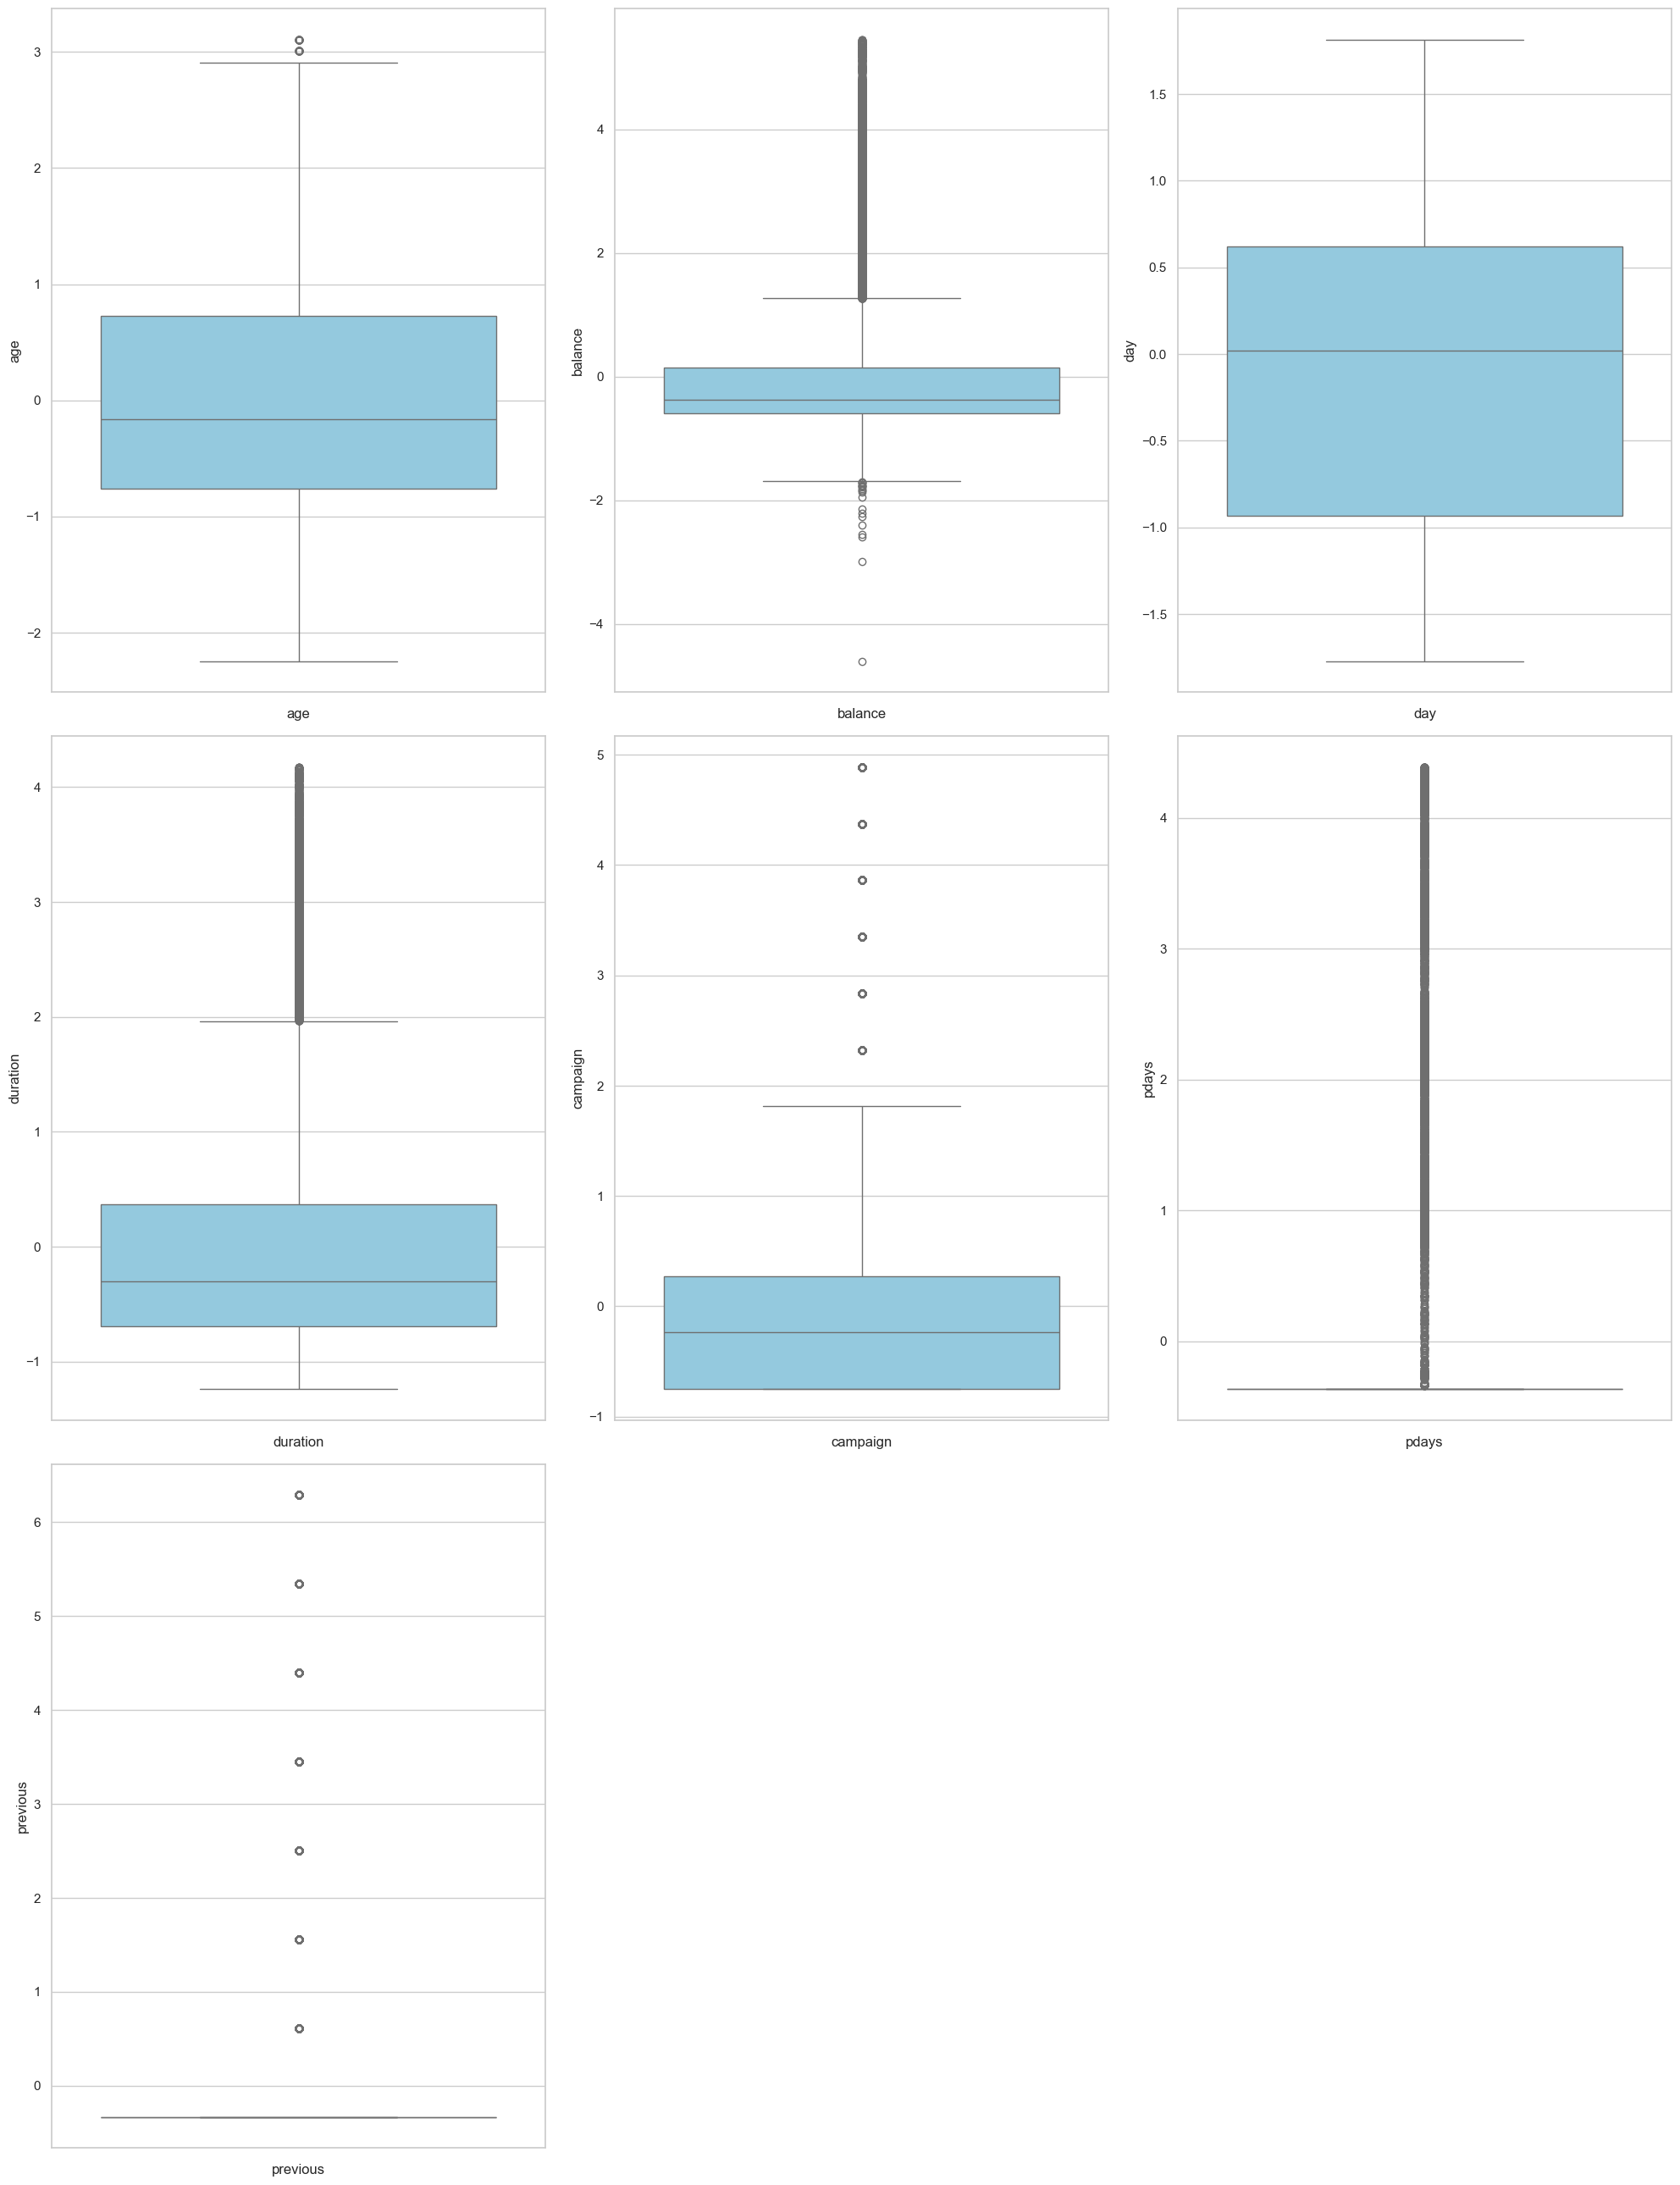

In [19]:
# Création d'une copie indépendante
df_filtered = df_filtered.copy()

# Normalisation des caractéristiques numériques
scaler = StandardScaler()
df_filtered[numerical_features] = scaler.fit_transform(df_filtered[numerical_features])

# Vérification des données normalisées avec des boxplots
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(len(numerical_features), 3, plotnumber)
    sns.boxplot(y=feature, data=df_filtered, color="skyblue")
    plt.xlabel(feature)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Encodage des données


Nous appliquerons l'encodeur 'Label Encoder' spécifiquement pour les attributs binaires. Ainsi, les valeurs de ces attributs sont transformées en 0 et 1, ce qui est idéal pour représenter des données binaires de manière numérique.

In [20]:
# Création d'un encodeur de labels
label_encoder = LabelEncoder()

# Liste des colonnes à encoder
binary_columns = [col for col in df_filtered.columns if df_filtered[col].nunique() == 2]

#  pour chaque colonne binaire on va appliquer ce codage
for col in binary_columns:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

# Vérification des modifications
print(df_filtered.head())

        age           job  marital  education  default   balance  housing  \
0  1.719153    management  married   tertiary        0  0.615006        1   
1  0.331162    technician   single  secondary        0 -0.612065        1   
2 -0.759402  entrepreneur  married  secondary        0 -0.627737        1   
3  0.628589   blue-collar  married    unknown        0  0.245260        1   
4 -0.759402       unknown   single    unknown        0 -0.628317        0   

   loan  contact       day month  duration  campaign     pdays  previous  \
0     0  unknown -1.293683   may  0.132376  -0.75041 -0.364878 -0.333655   
1     0  unknown -1.293683   may -0.445336  -0.75041 -0.364878 -0.333655   
2     1  unknown -1.293683   may -0.839231  -0.75041 -0.364878 -0.333655   
3     0  unknown -1.293683   may -0.755200  -0.75041 -0.364878 -0.333655   
4     0  unknown -1.293683   may -0.198495  -0.75041 -0.364878 -0.333655   

  poutcome  y  
0  unknown  0  
1  unknown  0  
2  unknown  0  
3  unknown  0  


Cependant, pour les variables catégorielles ayant plus de deux valeurs uniques, nous utiliserons plutôt le 'One-Hot Encoding'. Il crée une nouvelle colonne pour chaque valeur unique dans la variable catégorielle, où chaque colonne correspond à une catégorie et contient des valeurs binaires (0 ou 1) pour indiquer la présence ou l'absence de cette catégorie dans chaque observation.

In [21]:
catagorical_data_more_than_two = [col for col in catagorical_data if len(df_filtered[col].unique()) > 2]

df_encoded = pd.get_dummies(df_filtered, columns=catagorical_data_more_than_two)

print(df_encoded.head())

print(df_encoded.columns.tolist())

        age  default   balance  housing  loan       day  duration  campaign  \
0  1.719153        0  0.615006        1     0 -1.293683  0.132376  -0.75041   
1  0.331162        0 -0.612065        1     0 -1.293683 -0.445336  -0.75041   
2 -0.759402        0 -0.627737        1     1 -1.293683 -0.839231  -0.75041   
3  0.628589        0  0.245260        1     0 -1.293683 -0.755200  -0.75041   
4 -0.759402        0 -0.628317        0     0 -1.293683 -0.198495  -0.75041   

      pdays  previous  ...  month_jun  month_mar  month_may  month_nov  \
0 -0.364878 -0.333655  ...      False      False       True      False   
1 -0.364878 -0.333655  ...      False      False       True      False   
2 -0.364878 -0.333655  ...      False      False       True      False   
3 -0.364878 -0.333655  ...      False      False       True      False   
4 -0.364878 -0.333655  ...      False      False       True      False   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0

# Algorithmes ML

## KNN


[[7020  195]
 [ 572  255]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7215
           1       0.57      0.31      0.40       827

    accuracy                           0.90      8042
   macro avg       0.75      0.64      0.67      8042
weighted avg       0.89      0.90      0.89      8042



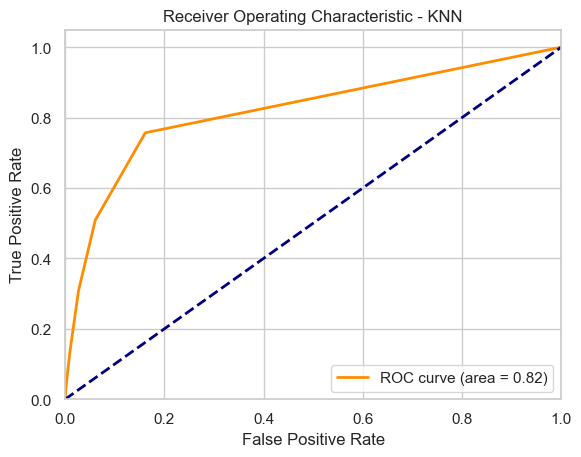

In [22]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Prédire les résultats pour l'ensemble de test
y_pred_knn = knn.predict(X_test)

# Évaluation du modèle
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

probas_knn = knn.predict_proba(X_test)

# Calculer les métriques ROC pour le modèle KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, probas_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Tracer la courbe ROC pour le modèle KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

Les résultats montrent que le modèle KNN, avec n_neighbors=5, est assez précis pour prédire la classe majoritaire '0', avec une précision de 92% et un rappel de 97%. Cela signifie que lorsque le modèle prédit la classe '0', il est correct 92% du temps, et il capture 97% des instances réelles de la classe '0' dans le jeu de données. Le f1-score de 0.95 indique également une bonne équilibre entre la précision et le rappel pour cette classe.

Cependant, pour la classe minoritaire '1', le modèle a une précision de seulement 57% et un rappel (**recall**)  de 31%. Cela implique que lorsqu'il prédit la classe '1', il est correct seulement un peu plus de la moitié du temps. De plus, il ne reconnaît que 31% des instances réelles (vrais positifs) de la classe '1', manquant ainsi un grand nombre de vrais positifs. Le f1-score de 0.40 pour la classe '1' indique une performance faible du modèle pour cette classe.

L'exactitude globale du modèle est de 89%, ce qui peut sembler élevé, mais elle est trompeuse en raison du déséquilibre des classes.

En résumé, bien que le modèle semble performant pour la classe majoritaire, il est nettement moins performant pour la classe minoritaire, ce qui est un problème commun dans les jeux de données déséquilibrés. Pour améliorer la performance du modèle sur la classe minoritaire, des techniques de rééchantillonnage telles que SMOTE peuvent être utilisées,

### Suréchantillonnage avec SMOTE

**SMOTE** pour le **suréchantillonnage** des ensembles de données de classification déséquilibrés :
Une approche pour traiter les ensembles de données déséquilibrés consiste à surexéchantillonner la classe minoritaire. La méthode la plus simple implique la duplication d'exemples de la classe minoritaire, bien que ces exemples n'ajoutent aucune nouvelle information au modèle. Au lieu de cela, de nouveaux exemples peuvent être synthétisés à partir des exemples existants. Il s'agit d'une forme d'augmentation de données pour la classe minoritaire et est appelée la Technique de Suréchantillonnage Minoritaire Synthétique, ou SMOTE en abrégé.

In [23]:
# Suréchantillonnage de l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn.fit(X_train_smote, y_train_smote)

y_pred_knns = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_knns))
print(classification_report(y_test, y_pred_knns))

probas_knn = knn.predict_proba(X_test)

[[6557  658]
 [ 351  476]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7215
           1       0.42      0.58      0.49       827

    accuracy                           0.87      8042
   macro avg       0.68      0.74      0.71      8042
weighted avg       0.89      0.87      0.88      8042



L'utilisation de SMOTE a significativement amélioré la capacité de notre modèle KNN à identifier correctement la classe minoritaire '1'. Après avoir appliqué SMOTE, le rappel pour la classe '1' a augmenté, ce qui signifie que le modèle est désormais capable de détecter une plus grande proportion des cas réels de cette classe minoritaire. Cependant, cette amélioration s'est accompagnée d'une augmentation des faux positifs pour la classe majoritaire '0', réduisant la précision globale du modèle. En somme, SMOTE a aidé à équilibrer la sensibilité du modèle entre les deux classes, améliorant la performance globale sur la classe minoritaire tout en entraînant une légère baisse de la précision pour la classe majoritaire.


## Random Forest



In [24]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[7073  142]
 [ 566  261]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7215
           1       0.65      0.32      0.42       827

    accuracy                           0.91      8042
   macro avg       0.79      0.65      0.69      8042
weighted avg       0.90      0.91      0.90      8042



Le modèle fonctionne bien pour la classe majoritaire mais a du mal à identifier correctement les cas de la classe minoritaire.

### Utilisation de SMOTE

In [25]:
rf.fit(X_train_smote, y_train_smote)

y_pred_rfs = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rfs))
print(classification_report(y_test, y_pred_rfs))

probas_rf = rf.predict_proba(X_test)

[[6847  368]
 [ 370  457]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7215
           1       0.55      0.55      0.55       827

    accuracy                           0.91      8042
   macro avg       0.75      0.75      0.75      8042
weighted avg       0.91      0.91      0.91      8042



Le modèle de forêt aléatoire semble offrir une meilleure performance globale que le modèle KNN, en particulier pour la classe minoritaire, qui est souvent la plus difficile à prédire correctement dans les ensembles de données déséquilibrés.

## Logistic Regression

In [26]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[7059  156]
 [ 557  270]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7215
           1       0.63      0.33      0.43       827

    accuracy                           0.91      8042
   macro avg       0.78      0.65      0.69      8042
weighted avg       0.90      0.91      0.90      8042



Classe 0 (Majoritaire) : Excellente performance avec une précision élevée (93%) et un rappel "recall" élevé (98%). Cela indique que le modèle est très efficace pour identifier correctement et capturer la majorité des instances de la classe 0.

Classe 1 (Minoritaire) : Performance modérée avec une précision de 63% et un rappel "recall" de 32%. Bien que le modèle ait une capacité raisonnable à identifier correctement la classe 1 lorsqu'il prédit qu'une instance appartient à cette classe, il ne capture qu'une partie relativement faible des instances réelles de la classe 1.

### Utilisation de SMOTE

In [27]:
logreg.fit(X_train_smote, y_train_smote)

y_pred_logs = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logs))
print(classification_report(y_test, y_pred_logs))
probas_lg = logreg.predict_proba(X_test)

[[6777  438]
 [ 376  451]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7215
           1       0.51      0.55      0.53       827

    accuracy                           0.90      8042
   macro avg       0.73      0.74      0.73      8042
weighted avg       0.90      0.90      0.90      8042



l'utilisation de SMOTE a permis d'améliorer significativement la détection de la classe minoritaire (classe 1) aux dépens d'une légère diminution de la performance pour la classe majoritaire (classe 0). Le modèle est maintenant plus équilibré en termes de détection des deux classes.

 => *En résumé, Random Forest est généralement le meilleur choix parmi les trois pour des ensembles de données complexes et déséquilibrés*

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 8), activation='relu',
                    solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[6999  216]
 [ 468  359]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7215
           1       0.62      0.43      0.51       827

    accuracy                           0.91      8042
   macro avg       0.78      0.70      0.73      8042
weighted avg       0.91      0.91      0.91      8042



Le modèle semble bien performant pour la classe majoritaire (0) avec une haute précision et rappel. Cependant, sa performance est moins satisfaisante pour la classe minoritaire (1) mais reste maeilleure que le reste des autres algorithmes utilisées.

## Naive Bayes

Pour les algorithmes de Naive Bayes et de Decision Tree, nous faisons de ne travailler qu'avec des attributs catégorielles. Ainsi nous avons donc converti les attributs numériques en catégories, en utilisant des intervalles.

In [29]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,1083.466189,15.819792,235.794723,2.464324,25.184312,0.352632
std,10.086648,1722.823814,8.363663,190.408412,1.951391,71.762763,1.056890
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,430.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,306.000000,3.000000,-1.000000,0.000000
max,72.000000,10483.000000,31.000000,1030.000000,12.000000,340.000000,7.000000


In [30]:
df_categorical = df2.copy()

df_categorical['age_group'] = pd.cut(df_categorical['age'], bins=[18, 30, 60, 95], labels=['young', 'middle-aged', 'senior'], right=False)

balance_percentiles = df_categorical['balance'].quantile([0.25, 0.75]).tolist()
df_categorical['balance_group'] = pd.cut(df_categorical['balance'], bins=[-float('inf'), balance_percentiles[0], balance_percentiles[1], float('inf')], labels=['low', 'medium', 'high'])

df_categorical['day_group'] = pd.cut(df_categorical['day'], bins=[0, 11, 21, 32], labels=['early-month', 'mid-month', 'end-month'], right=False)

df_categorical['duration_group'] = pd.cut(df_categorical['duration'], bins=[-float('inf'), 300, 900, float('inf')], labels=['short', 'medium', 'long'])

campaign_percentiles = df_categorical['campaign'].quantile([0.33, 0.66]).tolist()
df_categorical['campaign_group'] = pd.cut(df_categorical['campaign'], bins=[-float('inf'), campaign_percentiles[0], campaign_percentiles[1], float('inf')], labels=['low', 'medium', 'high'])

df_categorical['pdays_group'] = pd.cut(df_categorical['pdays'], bins=[-float('inf'), 0, 100, float('inf')], labels=['not contacted', 'recently contacted', 'contacted some time ago'])

df_categorical['previous_group'] = pd.cut(df_categorical['previous'], bins=[-float('inf'), 0, 3, float('inf')], labels=['no previous contacts', 'few', 'many'])

df_categorical.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,age_group,balance_group,day_group,duration_group,campaign_group,pdays_group,previous_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,middle-aged,high,early-month,short,low,not contacted,no previous contacts
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,middle-aged,high,early-month,short,low,not contacted,no previous contacts
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts


In [31]:
df_categorical.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,1083.466189,15.819792,235.794723,2.464324,25.184312,0.352632
std,10.086648,1722.823814,8.363663,190.408412,1.951391,71.762763,1.056890
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,430.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,306.000000,3.000000,-1.000000,0.000000
max,72.000000,10483.000000,31.000000,1030.000000,12.000000,340.000000,7.000000


In [32]:
df_with_categories_only = df_categorical.drop(columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
df_with_categories_only.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_group,balance_group,day_group,duration_group,campaign_group,pdays_group,previous_group
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,middle-aged,high,early-month,short,low,not contacted,no previous contacts
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,middle-aged,high,early-month,short,low,not contacted,no previous contacts
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,middle-aged,low,early-month,short,low,not contacted,no previous contacts


In [33]:
df_with_categories_only.isna().sum()

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
poutcome          0
y                 0
age_group         0
balance_group     0
day_group         0
duration_group    0
campaign_group    0
pdays_group       0
previous_group    0
dtype: int64

In [34]:
label_encoder = LabelEncoder()

binary_columns = [col for col in df_with_categories_only.columns if df_with_categories_only[col].nunique() == 2]

for col in binary_columns:
    df_with_categories_only[col] = label_encoder.fit_transform(df_with_categories_only[col])

categorical_data_more_than_two = [col for col in df_with_categories_only.columns if len(df_with_categories_only[col].unique()) > 2]

df_with_categories_only_encoded = pd.get_dummies(df_with_categories_only, columns=categorical_data_more_than_two)

In [35]:
Xnb = df_with_categories_only_encoded.drop('y', axis=1)
ynb = df_with_categories_only_encoded['y']

Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb, ynb, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
Xnb_train_smote, ynb_train_smote = smote.fit_resample(Xnb_train, ynb_train)

Avant SMOTE

In [36]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(Xnb_train, ynb_train)

ynb_pred = multinomial_nb.predict(Xnb_test)

print(confusion_matrix(ynb_test, ynb_pred))
print(classification_report(ynb_test, ynb_pred))

[[10124   735]
 [  742   462]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10859
           1       0.39      0.38      0.38      1204

    accuracy                           0.88     12063
   macro avg       0.66      0.66      0.66     12063
weighted avg       0.88      0.88      0.88     12063



Après SMOTE

In [37]:
multinomial_nb.fit(Xnb_train_smote, ynb_train_smote)

ynb_smote_pred = multinomial_nb.predict(Xnb_test)

print(confusion_matrix(ynb_test, ynb_smote_pred))
print(classification_report(ynb_test, ynb_smote_pred))

probas_nb = multinomial_nb.predict_proba(Xnb_test)

[[8782 2077]
 [ 385  819]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     10859
           1       0.28      0.68      0.40      1204

    accuracy                           0.80     12063
   macro avg       0.62      0.74      0.64     12063
weighted avg       0.89      0.80      0.83     12063



In [42]:
tree_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_model_gini.fit(Xnb_train_smote, ynb_train_smote)

# Modèle utilisant le critère d'Entropie
tree_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
# Modèle utilisant le critère de Gini
tree_model_entropy.fit(Xnb_train_smote, ynb_train_smote)

ydt_pred_tree_gini = tree_model_gini.predict(Xnb_test)
print("Gini Model:")
print(confusion_matrix(ynb_test, ydt_pred_tree_gini))
print(classification_report(ynb_test, ydt_pred_tree_gini))

ydt_pred_tree_entropy = tree_model_entropy.predict(Xnb_test)
print("Entropy Model:")
print(confusion_matrix(ynb_test, ydt_pred_tree_entropy))
print(classification_report(ynb_test, ydt_pred_tree_entropy))

probas_gtree = tree_model_gini.predict_proba(Xnb_test)
probas_entree = tree_model_entropy.predict_proba(Xnb_test)

Gini Model:
[[9969  890]
 [ 679  525]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10859
           1       0.37      0.44      0.40      1204

    accuracy                           0.87     12063
   macro avg       0.65      0.68      0.66     12063
weighted avg       0.88      0.87      0.87     12063

Entropy Model:
[[9988  871]
 [ 696  508]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10859
           1       0.37      0.42      0.39      1204

    accuracy                           0.87     12063
   macro avg       0.65      0.67      0.66     12063
weighted avg       0.88      0.87      0.87     12063



In [40]:
import os
os.environ['PATH'] += os.pathsep + r'C:\Program Files\Graphviz\bin'

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree_model_entropy,
    out_file=None,
    feature_names=Xnb.columns,
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=False,
    precision=2
)

# Visualiser l'arbre de décision avec graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf")  # Cela créera un fichier 'decision_tree.pdf' dans le répertoire actuel
graph.view("decision_tree")

'decision_tree.pdf'

Ce code génerera un fichier pdf permettant de visualiser l'arbre de décision

## SVM

Nous avons testé cet algorithme avec la base de données complète, mais il a pris 3 à 4 minutes pour s'éxecuter avec nos machines

En raison de la complexité de cet algorithme, nous avons finalement décidé de le tester avec la petite base

In [41]:
partial_df = df = pd.read_csv('datasource/bank.csv',delimiter=';', na_values='None')

In [43]:
partial_df_numeric = partial_df[numerical_features]
Z = (partial_df_numeric - partial_df_numeric.mean()) / data_numeric.std()

print('Nombre de lignes avant d’éliminer les outliers = %d' % (partial_df.shape[0]))

partial_df_filtered = df[(Z > -3).all(axis=1) & (Z <= 3).all(axis=1)]
print('Nombre de lignes après élimination des outliers = %d' % (partial_df_filtered.shape[0]))

Nombre de lignes avant d’éliminer les outliers = 4521
Nombre de lignes après élimination des outliers = 4024


In [44]:
partial_df_filtered = partial_df_filtered.copy()

scaler = StandardScaler()
partial_df_filtered[numerical_features] = scaler.fit_transform(partial_df_filtered[numerical_features])

In [45]:
for col in binary_columns:
    partial_df_filtered[col] = label_encoder.fit_transform(partial_df_filtered[col])

partial_df_filtered.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.081721,unemployed,married,primary,0,0.382278,0,0,cellular,0.366346,oct,-0.823037,-0.750917,-0.363166,-0.330816,unknown,0
1,-0.783431,services,married,secondary,0,2.081687,1,1,cellular,-0.597404,may,-0.116156,-0.750917,4.401506,3.461787,failure,0
2,-0.584571,management,single,tertiary,0,0.134896,1,0,cellular,0.004940,apr,-0.291623,-0.750917,4.275383,0.617335,failure,0
3,-1.081721,management,married,tertiary,0,0.206223,1,1,unknown,-1.561153,jun,-0.221436,0.747689,-0.363166,-0.330816,unknown,0
4,1.801748,blue-collar,married,secondary,0,-0.629329,1,0,unknown,-1.320216,may,-0.086076,-0.750917,-0.363166,-0.330816,unknown,0


In [46]:
partial_df_encoded = pd.get_dummies(partial_df_filtered, columns=catagorical_data_more_than_two)

In [47]:
partial_X = df_encoded.drop('y', axis=1)
partial_y = df_encoded['y']

partial_X_train, partial_X_test, partial_y_train, partial_y_test = train_test_split(partial_X, partial_y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='rbf', probability=True)

clf.fit(partial_X_train, partial_y_train)

partial_y_pred = clf.predict(partial_X_test)

print(confusion_matrix(partial_y_test, partial_y_pred))
print(classification_report(partial_y_test, partial_y_pred))

[[10687   172]
 [  874   330]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10859
           1       0.66      0.27      0.39      1204

    accuracy                           0.91     12063
   macro avg       0.79      0.63      0.67     12063
weighted avg       0.90      0.91      0.90     12063



In [48]:
smote = SMOTE(random_state=42)
partial_X_train_smote, partial_y_train_smote = smote.fit_resample(partial_X_train, partial_y_train)

clf.fit(partial_X_train_smote, partial_y_train_smote)

partial_y_pred2 = clf.predict(partial_X_test)

print(confusion_matrix(partial_y_test, partial_y_pred2))
print(classification_report(partial_y_test, partial_y_pred2))

probas_clf = clf.predict_proba(partial_X_test)

[[10168   691]
 [  512   692]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10859
           1       0.50      0.57      0.53      1204

    accuracy                           0.90     12063
   macro avg       0.73      0.76      0.74     12063
weighted avg       0.91      0.90      0.90     12063



# Conclusion générale

In [49]:
# Calcul des métriques pour chaque modèle
accuracy = [
    accuracy_score(y_test, y_pred_knns),
    accuracy_score(ynb_test, ynb_smote_pred),
    accuracy_score(ynb_test, ydt_pred_tree_entropy),
    accuracy_score(ynb_test, ydt_pred_tree_gini),
    accuracy_score(y_test, y_pred_rfs),
    accuracy_score(y_test, y_pred_logs)
]

precision = [
    precision_score(y_test, y_pred_knns, average='macro'),
    precision_score(ynb_test, ynb_smote_pred, average='macro'),
    precision_score(ynb_test, ydt_pred_tree_entropy, average='macro'),
    precision_score(ynb_test, ydt_pred_tree_gini, average='macro'),
    precision_score(y_test, y_pred_rfs, average="macro"),
    precision_score(y_test, y_pred_logs, average="macro")
]

# Calcul de l'AUC pour chaque modèle
auc_knn = roc_auc_score(y_test, probas_knn[:,1])
auc_naivebayes = roc_auc_score(ynb_test, probas_nb[:,1])
auc_tree_entropy = roc_auc_score(ynb_test, probas_entree[:,1])
auc_tree_gini = roc_auc_score(ynb_test, probas_gtree[:,1])
auc_rf = roc_auc_score(y_test, probas_rf[:,1])
auc_log = roc_auc_score(y_test, probas_lg[:,1])

roc_auc = [auc_knn, auc_naivebayes, auc_tree_entropy, auc_tree_gini, auc_rf, auc_log]

results_df = pd.DataFrame({
    "Model": [
        "KNN",
        "Naive Bayes",
        "Decision Tree (Entropy)",
        "Decision Tree (Gini)",
        "Random Forest",
        "Logistic Regression"
    ],
    "Accuracy": accuracy,
    "Precision": precision,
    "ROC AUC": roc_auc
})

# Afficher la matrice de synthèse
print(results_df)

                     Model  Accuracy  Precision   ROC AUC
0                      KNN  0.874534   0.684471  0.838265
1              Naive Bayes  0.795905   0.620403  0.828496
2  Decision Tree (Entropy)  0.870099   0.651619  0.682049
3     Decision Tree (Gini)  0.869933   0.653628  0.689443
4            Random Forest  0.908232   0.751336  0.923124
5      Logistic Regression  0.898781   0.727373  0.894292


L'algorithme SVM prenant énormément de temps pour s'éxecuter avec la grande base, nous l'avons avec la petite base. Ci dessous le code et sa sortie montrant les performances de cet algorithme

In [50]:
print("SVM")
svm_accuracy = accuracy_score(partial_y_test, partial_y_pred2)
svm_precision = precision_score(partial_y_test, partial_y_pred2)
svm_roc_auc = roc_auc_score(partial_y_test, partial_y_pred2)

print("Accuracy " + str(svm_accuracy))
print("Precision " + str(svm_precision))
print("ROC AUC " + str(svm_roc_auc))

SVM
Accuracy 0.9002735637901019
Precision 0.5003615328994938
ROC AUC 0.7555584892302694


On remarque, quel que soit le modèle, qu'on arrive à prédire correctement avec un fort pourcentage, les classes négatives. Cependant, il peine à prédire correctement les classes positives. Ceci en grande partie lié au fait que les classes négatives soient largement plus nombreuses que les classes postives.

Nous avons essayé de limiter cela en utilisant la technique de l'oversampling, en utilisant le module SMOTE de la librairie imblearn.

Nous terminons la partie des apprentissages en récapitulant dans un tableau les différents scores des différents modèles. Les algorithmes Random Forest et Logistic Regression sont particulièrement plus performants que les autres.

SVM, de son côté, a une efficacité très importante mais peine à la précision contrairement aux autres algorithmes.